### Installing Libiaries ###

In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade transformers


In [ ]:
pip install transformers datasets torch scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install evaluate



In [ ]:
pip install tf-keras


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install accelerate>=0.26.0


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show accelerate


Name: accelerate
Version: 1.1.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install transformers[torch]


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print(f"CUDA is enabled! GPU name: {torch.cuda.get_device_name(0)}")
    print(f"CUDA Version: {torch.version.cuda}")
else:
    print("CUDA is not available.")

CUDA is enabled! GPU name: NVIDIA GeForce RTX 3060
CUDA Version: 12.4


## Dataset Cleaning ##


In [ ]:
import pandas as pd

# Provide the full local path to your dataset
file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/kaggledataset/Combined Data.csv'

# Load the dataset using pandas
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [ ]:
import pandas as pd

data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


(None,
    Unnamed: 0                                          statement   status
 0           0                                         oh my gosh  Anxiety
 1           1  trouble sleeping, confused mind, restless hear...  Anxiety
 2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
 3           3  I've shifted my focus to something else but I'...  Anxiety
 4           4  I'm restless and restless, it's been a month n...  Anxiety)

## Dataset spliting training, validatation, and testing ##


In [ ]:
import os

# Define base directory
base_dir = r"C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits"

# Create train, val, and test subdirectories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they don't already exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

print("Directories created successfully!")


Directories created successfully!


Make the train, val, and test folders

In [ ]:

import pandas as pd

# Load your dataset
file_path = file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/kaggledataset/Combined Data.csv'
df = pd.read_csv(file_path)


unique_labels = df['status'].unique()
print("Unique labels:", unique_labels)



Unique labels: ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


Label distribution:
status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


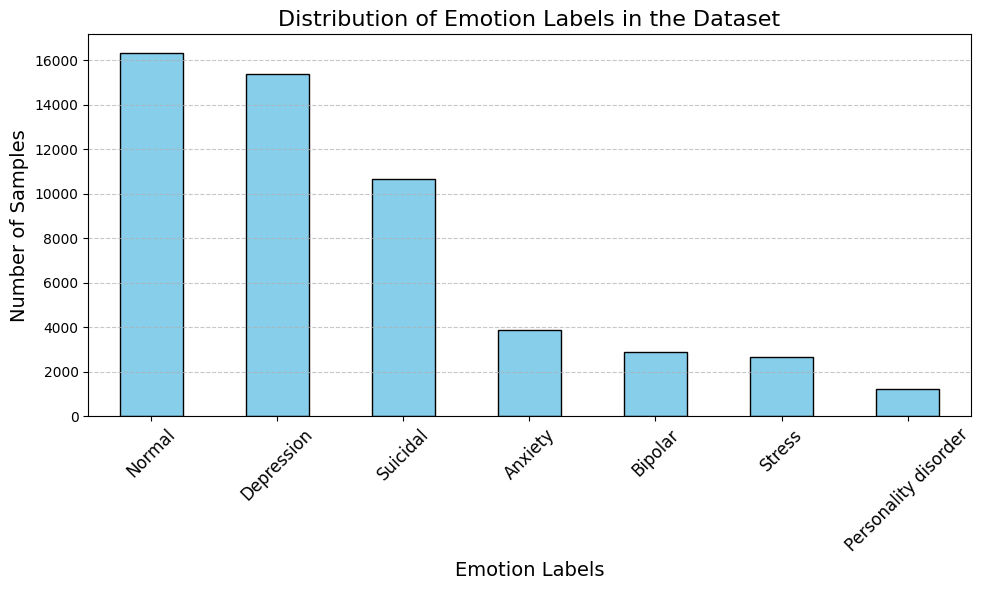

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/kaggledataset/Combined Data.csv'
df = pd.read_csv(file_path)

# Count the occurrences of each label
label_counts = df['status'].value_counts()

# Print the counts (optional)
print("Label distribution:")
print(label_counts)

# Plot a bar graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Emotion Labels in the Dataset', fontsize=16)
plt.xlabel('Emotion Labels', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load your dataset
file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/kaggledataset/Combined Data.csv'
df = pd.read_csv(file_path)

# Check class distribution
print(df['status'].value_counts())

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


Upon further consideration, I have decided to drop the bipolar and personality disorder emotion classifications, as it is difficult to find additional datasets to balance them effectively. To address the imbalance in the remaining dataset, I will limit the other emotion categories to a maximum of 5,000 samples. Additionally, I will combine anxiety and stress into a single category, as they are similar in nature.

Updated Status:

Normal: 5,000

Depression: 5,000

Suicidal: 5,000

Anxiety/Stress (combined): 5,000

This adjustment will help balance the dataset while ensuring it remains manageable for further processing


In [ ]:
# Get the count of samples per class
class_counts = df['status'].value_counts()

# Calculate the median class size
median_size = class_counts.median()

print(f"Median class size: {median_size}")

Median class size: 3888.0


In [ ]:
import pandas as pd

# Load your dataset
file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/kaggledataset/Combined Data.csv'
df = pd.read_csv(file_path)

# Limit Normal, Depression, and Suicidal to 5,000 samples each
categories_to_limit = ['Normal', 'Depression', 'Suicidal']
df_limited = pd.concat([
    df[df['status'] == category].sample(n=5000, random_state=42)  # Sample 5,000 rows
    for category in categories_to_limit
])

# Combine Anxiety and Stress into a single category
combined_anxiety_stress = pd.concat([
    df[df['status'] == 'Anxiety'],  # Keep all Anxiety rows
    df[df['status'] == 'Stress']   # Keep all Stress rows
])

# If the combined total exceeds 5,000, sample 5,000 rows
if len(combined_anxiety_stress) > 5000:
    combined_anxiety_stress = combined_anxiety_stress.sample(n=5000, random_state=42)

# Rename the combined category
combined_anxiety_stress['status'] = 'Anxiety/Stress'

# Combine all balanced categories into a single dataset
df_balanced = pd.concat([df_limited, combined_anxiety_stress])

# Save the balanced dataset
output_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Balanced_Combined_Data_Output.csv'
df_balanced.to_csv(output_path, index=False)

# Check the new class distribution
print(df_balanced['status'].value_counts())







status
Normal            5000
Depression        5000
Suicidal          5000
Anxiety/Stress    5000
Name: count, dtype: int64


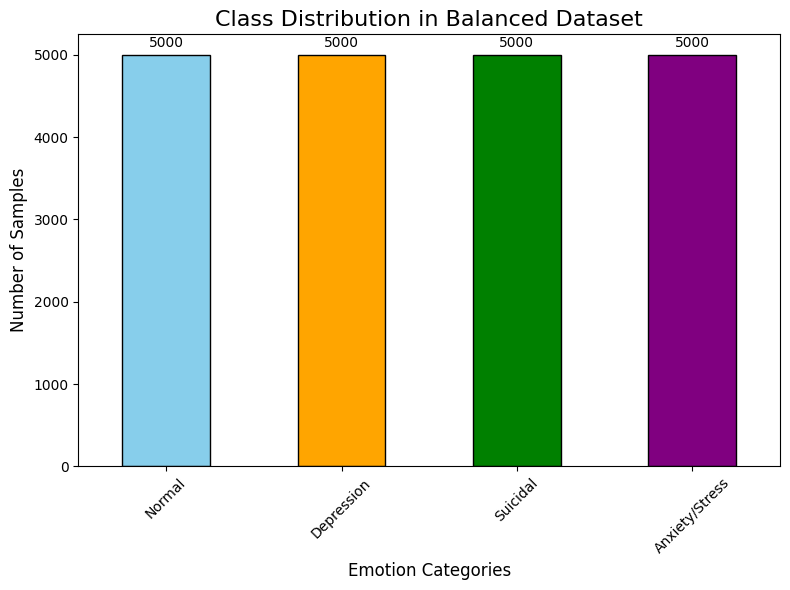

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the balanced dataset
output_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Balanced_Combined_Data_Output.csv'
df_balanced = pd.read_csv(output_path)

# Get the new class distribution
class_counts = df_balanced['status'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')

# Add titles and labels
plt.title('Class Distribution in Balanced Dataset', fontsize=16)
plt.xlabel('Emotion Categories', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the value counts on top of each bar
for index, value in enumerate(class_counts):
    plt.text(index, value + 100, str(value), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re

# Path to the CSV file
input_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Balanced_Combined_Data_Output.csv'
output_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Cleaned_Data_Output.csv'

# Load the dataset
df = pd.read_csv(input_path)

# Function to clean text
def clean_text(text):
    # Ensure input is a string
    text = str(text)
    # Remove special characters, keeping only alphanumerics and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'statement' column
df['statement'] = df['statement'].apply(clean_text)

# Save the cleaned dataset
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to {output_path}")


Cleaned dataset saved to C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Cleaned_Data_Output.csv


In [ ]:
import pandas as pd
import re

# Path to the cleaned dataset
cleaned_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Cleaned_Data_Output.csv'

# Load the cleaned dataset
df = pd.read_csv(cleaned_data_path)

# Function to check if the text is clean
def is_clean(text):
    # Ensure input is a string
    text = str(text)
    # Match any character that is not alphanumeric or a space
    if re.search(r'[^a-zA-Z0-9\s]', text):
        return False
    # Check for multiple spaces
    if re.search(r'\s{2,}', text):
        return False
    return True

# Apply the function to the 'statement' column
df['is_clean'] = df['statement'].apply(is_clean)

# Filter rows that are not clean
unclean_rows = df[~df['is_clean']]

# Output results
if not unclean_rows.empty:
    print("Some rows still contain unwanted characters or formatting issues:")
    print(unclean_rows[['statement']])  # Display only the problematic 'statement' column
    print(f"\nTotal unclean rows: {len(unclean_rows)}")
else:
    print("All rows are successfully cleaned.")

All rows are successfully cleaned.


So the newly clean folder is free of all the extra characters and been double checked

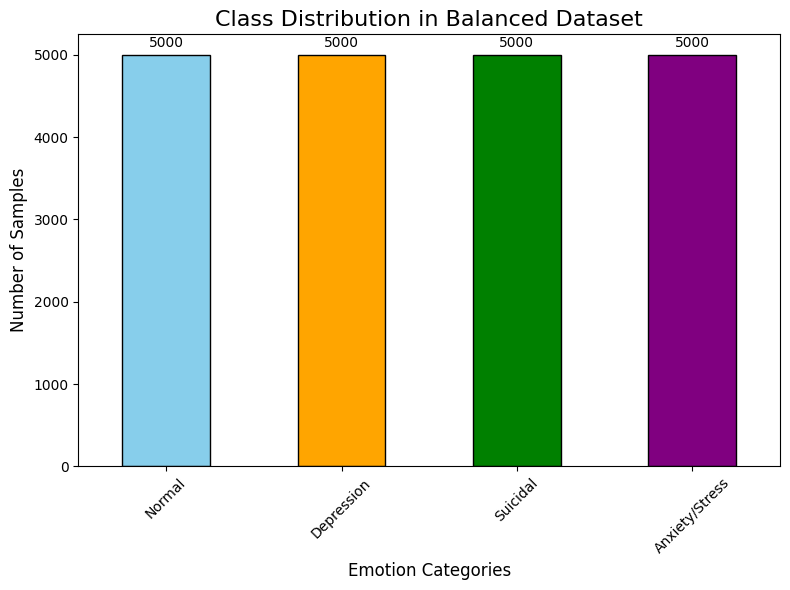

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the balanced dataset
output_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH/Cleaned_Data_Output.csv'
df_balanced = pd.read_csv(output_path)

# Get the new class distribution
class_counts = df_balanced['status'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'], edgecolor='black')

# Add titles and labels
plt.title('Class Distribution in Balanced Dataset', fontsize=16)
plt.xlabel('Emotion Categories', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the value counts on top of each bar
for index, value in enumerate(class_counts):
    plt.text(index, value + 100, str(value), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Checking the visual distrbution of the four emotions I'm going to use

##Spliting train, validation, testing folders##

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load load cleaned dataset
file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/Cleaned_Data_Output.csv'
df_balanced = pd.read_csv(file_path)

# Check columns to ensure correct loading
print(df_balanced.columns)

# Split the dataset into features (X) and labels (y)
X = df_balanced['statement']  # Using 'statement' column as the text data
y = df_balanced['status']

# Correct split ratios: 80% training, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split the remaining data into 50% validation and 50% test (10% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Combine features and labels back into dataframes for easy saving if needed
train_data = pd.DataFrame({'text': X_train, 'status': y_train})
val_data = pd.DataFrame({'text': X_val, 'status': y_val})
test_data = pd.DataFrame({'text': X_test, 'status': y_test})

# Save the splits to CSV (optional)
# train_data.to_csv(r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\train\Train_Data.csv', index=False)
# val_data.to_csv(r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\val\Validation_Data.csv', index=False)
# test_data.to_csv(r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\test\Test_Data.csv', index=False)

# Print dataset sizes
print(f"Training Set: {len(train_data)} samples")
print(f"Validation Set: {len(val_data)} samples")
print(f"Test Set: {len(test_data)} samples")

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')
Training Set: 16000 samples
Validation Set: 2000 samples
Test Set: 2000 samples


In [ ]:
import pandas as pd
import re

# Path to the cleaned dataset
cleaned_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/Data_Splits/test/Test_Data.csv'

# Load the cleaned dataset
df = pd.read_csv(cleaned_data_path)

# Function to check if the text is clean
def is_clean(text):
    # Ensure input is a string
    text = str(text)
    # Match any character that is not alphanumeric or a space
    if re.search(r'[^a-zA-Z0-9\s]', text):
        return False
    # Check for multiple spaces
    if re.search(r'\s{2,}', text):
        return False
    return True

# Apply the function to the 'statement' column
df['is_clean'] = df['text'].apply(is_clean)

# Filter rows that are not clean
unclean_rows = df[~df['is_clean']]

# Output results
if not unclean_rows.empty:
    print("Some rows still contain unwanted characters or formatting issues:")
    print(unclean_rows[['text']])  # Display only the problematic 'statement' column
    print(f"\nTotal unclean rows: {len(unclean_rows)}")
else:
    print("All rows are successfully cleaned.")

All rows are successfully cleaned.


In [ ]:
import pandas as pd
import re

# Path to the cleaned dataset
cleaned_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/Data_Splits/train/Train_Data.csv'

# Load the cleaned dataset
df = pd.read_csv(cleaned_data_path)

# Function to check if the text is clean
def is_clean(text):
    # Ensure input is a string
    text = str(text)
    # Match any character that is not alphanumeric or a space
    if re.search(r'[^a-zA-Z0-9\s]', text):
        return False
    # Check for multiple spaces
    if re.search(r'\s{2,}', text):
        return False
    return True

# Apply the function to the 'statement' column
df['is_clean'] = df['text'].apply(is_clean)

# Filter rows that are not clean
unclean_rows = df[~df['is_clean']]

# Output results
if not unclean_rows.empty:
    print("Some rows still contain unwanted characters or formatting issues:")
    print(unclean_rows[['text']])  # Display only the problematic 'statement' column
    print(f"\nTotal unclean rows: {len(unclean_rows)}")
else:
    print("All rows are successfully cleaned.")

All rows are successfully cleaned.


In [ ]:
import pandas as pd
import re

# Path to the cleaned dataset
cleaned_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/Data_Splits/val/Validation_Data.csv'

# Load the cleaned dataset
df = pd.read_csv(cleaned_data_path)

# Function to check if the text is clean
def is_clean(text):
    # Ensure input is a string
    text = str(text)
    # Match any character that is not alphanumeric or a space
    if re.search(r'[^a-zA-Z0-9\s]', text):
        return False
    # Check for multiple spaces
    if re.search(r'\s{2,}', text):
        return False
    return True

# Apply the function to the 'statement' column
df['is_clean'] = df['text'].apply(is_clean)

# Filter rows that are not clean
unclean_rows = df[~df['is_clean']]

# Output results
if not unclean_rows.empty:
    print("Some rows still contain unwanted characters or formatting issues:")
    print(unclean_rows[['text']])  # Display only the problematic 'statement' column
    print(f"\nTotal unclean rows: {len(unclean_rows)}")
else:
    print("All rows are successfully cleaned.")

All rows are successfully cleaned.


In [ ]:
import pandas as pd

# Corrected file path with raw string
file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\IAT360FINALPROJECTOWNDATA.csv'
df = pd.read_csv(file_path)

# Drop unwanted columns
columns_to_drop = ['annotation_id', 'annotator', 'created_at', 'id', 'lead_time', 'updated_at']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Reorder columns: text first, sentiment second
df_cleaned = df_cleaned[['text', 'sentiment']]

# Save the cleaned data to a new CSV file
cleaned_file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Cleaned_OWN_Data.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())




                                                text   sentiment
0  I just feel so numb all the time, like nothing...  Depression
1  No one really cares about me, so what's the po...  Depression
2      Waking up feels like a punishment these days.  Depression
3  I'm constantly exhausted, even when I haven't ...  Depression
4  Everything I do feels meaningless, like I'm st...  Depression


Combine with cleand testdata

In [113]:
import pandas as pd

# Load the cleaned own data
cleaned_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/Cleaned_OWN_Data.csv'
df_cleaned = pd.read_csv(cleaned_data_path)

# Load the test data
test_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\/Data_Splits/test/Test_Data.csv'
df_test = pd.read_csv(test_data_path)

# Rename 'sentiment' column in the own data to 'status' to match the test data column name
df_cleaned.rename(columns={'sentiment': 'status'}, inplace=True)

# Concatenate the cleaned own data and test data
combined_df = pd.concat([df_test, df_cleaned], ignore_index=True)

# Save the combined dataset as a new CSV file
combined_file_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Test_and_OwnData_Combined.csv'
combined_df.to_csv(combined_file_path, index=False)

# Print the first few rows of the combined DataFrame
print(combined_df.head())


                                                text          status
0  I am so upset and I hate myself I want to fuck...      Depression
1  Tonight right now I am going to try to talk to...        Suicidal
2                Wake up horny Hahaha tara jakol f2f          Normal
3  Already borrowed what I can from family and fr...  Anxiety/Stress
4  I cannot think straight all I hear is failure ...        Suicidal


In [114]:
# Check the shape of the combined DataFrame
print(combined_df.shape)


(2040, 2)


Check and see if the split dataset from test,validationm,and test are also free of special characters

## Tokenizing our dataset with the BERT's Fast Tokenizer ##

In [2]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, ClassLabel, Value
from transformers import DistilBertTokenizer
import pandas as pd

# Load the datasets
train_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\train\Train_Data.csv'
validation_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\val\Validation_Data.csv'
test_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\test\Test_Data.csv'

train_df = pd.read_csv(train_data_path)
validation_df = pd.read_csv(validation_data_path)
test_df = pd.read_csv(test_data_path)

# Convert any non-string values in the text column to strings
train_df['text'] = train_df['text'].astype(str)
validation_df['text'] = validation_df['text'].astype(str)
test_df['text'] = test_df['text'].astype(str)

# Define the labels based on train dataset (all datasets should have the same labels)
labels = train_df['status'].unique().tolist()

# Convert the pandas dataframes to datasets
train_ds = Dataset.from_pandas(train_df)
validation_ds = Dataset.from_pandas(validation_df)
test_ds = Dataset.from_pandas(test_df)

# Define the ClassLabel feature (Assuming there are 4 unique labels)
ClassLabels = ClassLabel(num_classes=4, names=labels)

# Cast the 'status' column to the ClassLabel type and 'text' column to string type
train_ds = train_ds.cast_column('status', ClassLabels)
validation_ds = validation_ds.cast_column('status', ClassLabels)
test_ds = test_ds.cast_column('status', ClassLabels)

train_ds = train_ds.cast_column('text', Value('string'))
validation_ds = validation_ds.cast_column('text', Value('string'))
test_ds = test_ds.cast_column('text', Value('string'))

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(examples):
    # Ensure 'text' is a list of strings (even if it's a single example)
    texts = examples['text']  # Assuming 'text' is the column containing the input text

    # Tokenize the examples
    return tokenizer(texts, truncation=True, padding='max_length', max_length=512, return_tensors=None)

# Apply the tokenization function to each dataset
tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_validation = validation_ds.map(tokenize_function, batched=True)
tokenized_test = test_ds.map(tokenize_function, batched=True)

print("Tokenized datasets have been saved successfully!")


Casting the dataset:   0%|          | 0/16000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/16000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Tokenized datasets have been saved successfully!


Note I have manually placed the test_owndata combined into the test folder so I can use it for the updated training and testing from this point on

In [120]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, ClassLabel, Value
from transformers import DistilBertTokenizer
import pandas as pd

# Load the datasets
train_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\train\Train_Data.csv'
validation_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\val\Validation_Data.csv'
test_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits/test/Test_and_OwnData_Combined.csv'

train_df = pd.read_csv(train_data_path)
validation_df = pd.read_csv(validation_data_path)
test_df = pd.read_csv(test_data_path)

# Convert text column to string
train_df['text'] = train_df['text'].astype(str)
validation_df['text'] = validation_df['text'].astype(str)
test_df['text'] = test_df['text'].astype(str)

# Define labels based on training set
labels = train_df['status'].unique().tolist()

# Convert the pandas dataframes to datasets
train_ds = Dataset.from_pandas(train_df)
validation_ds = Dataset.from_pandas(validation_df)
test_ds = Dataset.from_pandas(test_df)

# Define ClassLabel
ClassLabels = ClassLabel(num_classes=len(labels), names=labels)

# Cast 'status' to ClassLabel and 'text' to string
train_ds = train_ds.cast_column('status', ClassLabels)
validation_ds = validation_ds.cast_column('status', ClassLabels)
test_ds = test_ds.cast_column('status', ClassLabels)

train_ds = train_ds.cast_column('text', Value('string'))
validation_ds = validation_ds.cast_column('text', Value('string'))
test_ds = test_ds.cast_column('text', Value('string'))

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization function including labels
def tokenize_function(examples):
    return {
        **tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512),
        'labels': examples['status']  # Ensure labels are added
    }

# Tokenize datasets
tokenized_train = train_ds.map(tokenize_function, batched=True)
tokenized_validation = validation_ds.map(tokenize_function, batched=True)
tokenized_test = test_ds.map(tokenize_function, batched=True)

print("Tokenized datasets have been saved successfully!")


Casting the dataset:   0%|          | 0/16000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2040 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/16000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2040 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2040 [00:00<?, ? examples/s]

Tokenized datasets have been saved successfully!


In [121]:
print("Test dataset info:")
print(test_df)
test_df.info()

Test dataset info:
                                                   text          status
0     I am so upset and I hate myself I want to fuck...      Depression
1     Tonight right now I am going to try to talk to...        Suicidal
2                   Wake up horny Hahaha tara jakol f2f          Normal
3     Already borrowed what I can from family and fr...  Anxiety/Stress
4     I cannot think straight all I hear is failure ...        Suicidal
...                                                 ...             ...
2035  Work was busy, but I feel good about what I go...          Normal
2036  Saw a beautiful sunset on my way home—life’s l...          Normal
2037  Feeling productive today! Got a lot checked of...          Normal
2038  Spent some time organizing my room—it feels so...          Normal
2039  Nothing special happening today, but I’m content.          Normal

[2040 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (tota

ok there was an issue here with null but it seem to be fixed now i start doing the rest of the fine tuning with these new tokenized stuff

updated tokenizer

In [ ]:
# Load the datasets
train_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\train\Train_Data.csv'
val_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\val\Validation_Data.csv'
test_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\test\Test_Data.csv'

train_df = pd.read_csv(train_data_path)
val_df = pd.read_csv(val_data_path)
test_df = pd.read_csv(test_data_path)
labels = train_df['status'].unique().tolist()
train_ds = Dataset.from_pandas(train_df)
ClassLabels = ClassLabel(num_classes=4, names=labels)



train_ds = train_ds.cast_column('status', ClassLabels)
train_ds = train_ds.cast_column('text', Value('string'))

Casting the dataset:   0%|          | 0/16000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/16000 [00:00<?, ? examples/s]

do it for the other files

In [ ]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'status': ClassLabel(names=['Suicidal', 'Anxiety/Stress', 'Depression', 'Normal'], id=None)}

In [ ]:
tokenized_train_ds = train_ds.map(tokenize_function, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

ValueError: Input is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

In [ ]:
train_dataset.features

{'text': Value(dtype='string', id=None),
 'status': Value(dtype='int64', id=None)}

In [ ]:
train_dataset[0]

{'text': 'Does anyone else find that when they are feeling really bad thoughts of suicide take on an almost comforting tone it is like a reminder that as bad as it gets I always have that option It honestly calms me down when I am feeling at my lowest Comforting suicidal thoughts',
 'status': 2}

In [ ]:
print(train_df.head())

                                                text  status
0  Does anyone else find that when they are feeli...       2
1  Intern Guys Im going through my second month o...       3
2  I am alone I am always going to be alone I can...       2
3  I think i was scarred for life and i was alrea...       1
4  can t seem to get over the dissapointment of h...       0


In [ ]:
from transformers import AutoTokenizer

checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
tokenizer
from transformers import AutoTokenizer
from datasets import Dataset
import pandas as pd

# Load data
train_data_path = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\Data_Splits\train\Train_Data.csv'
train_df = pd.read_csv(train_data_path)

# Load AutoTokenizer
checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)

# Ensure 'text' column is of string type
train_df['text'] = train_df['text'].astype(str)

# Define Tokenization Function
def tokenize_function(examples):
    return tokenizer(
        examples['text'],           # 'text' column contains input sentences
        truncation=True,            # Truncate sequences longer than the model's max length
        padding='max_length',       # Pad sequences to max length
        max_length=512,             # Max sequence length for BERT-based models
        return_tensors=None         # Return lists, not PyTorch tensors
    )

# Convert DataFrame to Dataset
train_dataset = Dataset.from_pandas(train_df)

# Tokenize the data
tokenized_train = train_dataset.map(tokenize_function, batched=True)

# Inspect tokenized data
print("Sample tokenized data:", tokenized_train[0])  # This will show the tokenized content


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Sample tokenized data: {'text': 'Does anyone else find that when they are feeling really bad thoughts of suicide take on an almost comforting tone it is like a reminder that as bad as it gets I always have that option It honestly calms me down when I am feeling at my lowest Comforting suicidal thoughts', 'status': 'Suicidal', 'input_ids': [101, 2515, 3087, 2842, 2424, 2008, 2043, 2027, 2024, 3110, 2428, 2919, 4301, 1997, 5920, 2202, 2006, 2019, 2471, 16334, 4309, 2009, 2003, 2066, 1037, 14764, 2008, 2004, 2919, 2004, 2009, 4152, 1045, 2467, 2031, 2008, 5724, 2009, 9826, 5475, 2015, 2033, 2091, 2043, 1045, 2572, 3110, 2012, 2026, 7290, 16334, 26094, 4301, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(train_dataset[0])  # Check the structure of the first record


{'text': 'Does anyone else find that when they are feeling really bad thoughts of suicide take on an almost comforting tone it is like a reminder that as bad as it gets I always have that option It honestly calms me down when I am feeling at my lowest Comforting suicidal thoughts', 'status': 'Suicidal'}


In [ ]:
import evaluate
import numpy as np

# we setup the training to evaluate the accuracy and f1 scores

accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels)
    return {**accuracy, **f1}

In [ ]:
import evaluate
import numpy as np

# Load metrics
accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')
precision_metric = evaluate.load('precision')
recall_metric = evaluate.load('recall')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')
    precision = precision_metric.compute(predictions=predictions, references=labels, average='weighted')
    recall = recall_metric.compute(predictions=predictions, references=labels, average='weighted')

    return {**accuracy, **f1, **precision, **recall}

In [100]:
print("Label to ID mapping:", model.config.label2id)  # This should print your labels
print("ID to Label mapping:", model.config.id2label)  # This should print your labels


Label to ID mapping: {'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3, 'Suicidal': 0}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


In [ ]:
from transformers import AutoModelForSequenceClassification

# Extract unique labels from the training dataset
labels = train_df['status'].unique().tolist()
print("Labels from the training dataset:", labels)

# Define the number of labels
num_labels = len(labels)

# Define the mapping from label to ID and ID to label
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Initialize the model with the correct label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',  # or any other model checkpoint you're using
    num_labels=num_labels,
    label2id=label2id,  # Pass the label to ID mapping
    id2label=id2label   # Pass the ID to label mapping
)

# Verify that the model has the correct mappings
print("Label to ID mapping:", model.config.label2id)
print("ID to Label mapping:", model.config.id2label)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Labels from the training dataset: ['Suicidal', 'Anxiety/Stress', 'Depression', 'Normal']
Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


In [ ]:
print("Label to ID mapping:", model.config.label2id)  # This should print your labels
print("ID to Label mapping:", model.config.id2label)  # This should print your labels

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


In [ ]:
import wandb
# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=1000, return_tensors=None)

# Convert to Dataset
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize the datasets
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

# Set up model and trainer
checkpoint = 'distilbert-base-uncased'
num_labels = 4
id2label = {0: 'Normal', 1: 'Depression', 2: 'Suicidal', 3: 'Anxiety/Stress'}
label2id = {'Normal': 0, 'Depression': 1, 'Suicidal': 2, 'Anxiety/Stress': 3}

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels, id2label=id2label, label2id=label2id)

# Define training arguments
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    load_best_model_at_end=True,
)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    compute_metrics=compute_metrics,  # Define this function for accuracy or F1
)

# Disable wandb logging
import os
os.environ['WANDB_DISABLED'] = "true"

In [68]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
import evaluate  # Import evaluate instead of load_metric

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Define custom labels (update based on your dataset)
num_labels = len(train_dataset.features['status'].names)  # Correctly reference 'status' feature directly

model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=num_labels,
    id2label={i: label for i, label in enumerate(train_dataset.features['status'].names)},
    label2id={label: i for i, label in enumerate(train_dataset.features['status'].names)}
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=1,  # Adjust number of epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\1113324712.py:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.403000,0.401658,0.836000,0.834082,0.838924,0.836000


TrainOutput(global_step=1000, training_loss=0.5268101387023926, metrics={'train_runtime': 473.3451, 'train_samples_per_second': 33.802, 'train_steps_per_second': 2.113, 'total_flos': 2119553974272000.0, 'train_loss': 0.5268101387023926, 'epoch': 1.0})

the logs for this one is /logs/events.out.tfevents.1733470381.DESKTOP-VU0CKF5.29384.9

In [29]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
import evaluate  # Import evaluate instead of load_metric

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=1,  # Adjust number of epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()


Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\1673744506.py:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.404000,0.400884,0.838500,0.836526,0.841579,0.838500


TrainOutput(global_step=1000, training_loss=0.5271187896728515, metrics={'train_runtime': 470.1614, 'train_samples_per_second': 34.031, 'train_steps_per_second': 2.127, 'total_flos': 2119553974272000.0, 'train_loss': 0.5271187896728515, 'epoch': 1.0})

log is /logs/events.out.tfevents.1733470932.DESKTOP-VU0CKF5.29384.10

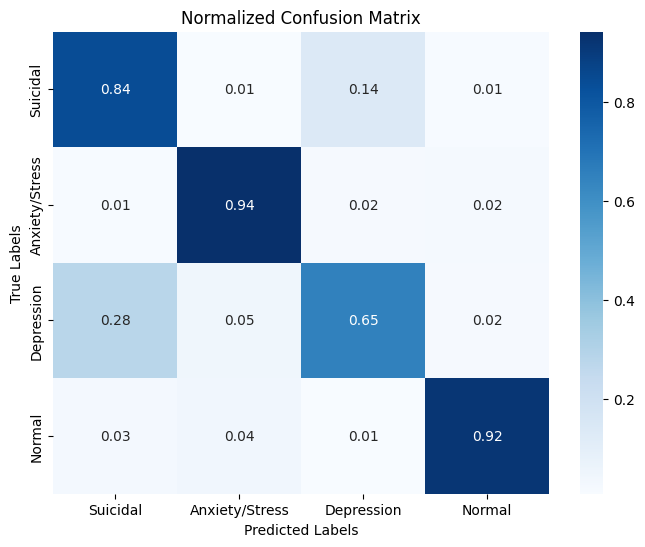

<Figure size 640x480 with 0 Axes>

In [69]:
from sklearn.metrics import confusion_matrix  # Make sure to import confusion_matrix
import matplotlib.pyplot as plt  # Import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# After training, make predictions on the test dataset
predictions_output = trainer.predict(test_dataset)

# Extract the logits (raw predictions) and true labels
logits = predictions_output.predictions
true_labels = predictions_output.label_ids

# Convert logits to predicted labels
predicted_labels = np.argmax(logits, axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix by row
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualize the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()
output_dir = './Results/checkpoint-1000'  # Path to the checkpoint folder
if not os.path.exists(output_dir):
    os.makedirs(output_dir)  # Create the folder if it doesn't exist

# Save the plot as an image (e.g., PNG file)
plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))

# Show the plot
plt.show()

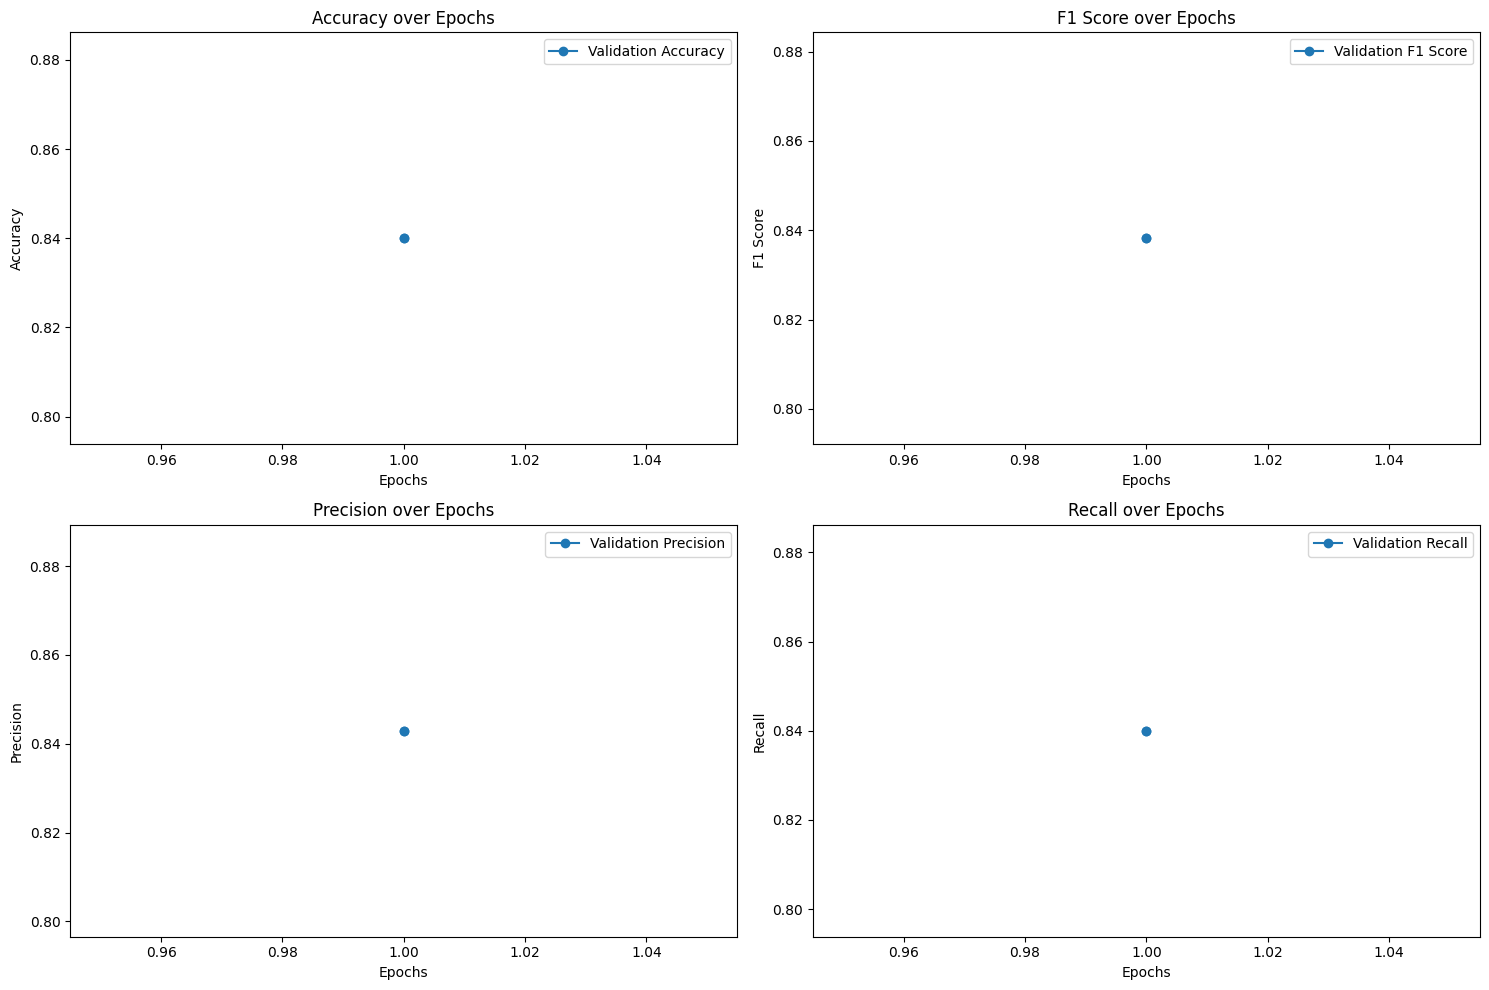

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Get the training logs from the trainer
log_history = trainer.state.log_history  # This contains all the logs during training

# Convert the log history into a pandas DataFrame
log_df = pd.DataFrame(log_history)

# Plotting the training and validation metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot accuracy
axes[0, 0].plot(log_df['epoch'], log_df['eval_accuracy'], label='Validation Accuracy', marker='o')
axes[0, 0].set_title('Accuracy over Epochs')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()

# Plot F1 score
axes[0, 1].plot(log_df['epoch'], log_df['eval_f1'], label='Validation F1 Score', marker='o')
axes[0, 1].set_title('F1 Score over Epochs')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('F1 Score')
axes[0, 1].legend()

# Plot precision
axes[1, 0].plot(log_df['epoch'], log_df['eval_precision'], label='Validation Precision', marker='o')
axes[1, 0].set_title('Precision over Epochs')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()

# Plot recall
axes[1, 1].plot(log_df['epoch'], log_df['eval_recall'], label='Validation Recall', marker='o')
axes[1, 1].set_title('Recall over Epochs')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [70]:
trainer.evaluate(tokenized_validation)


{'eval_loss': 0.40165844559669495,
 'eval_accuracy': 0.836,
 'eval_f1': 0.834082308010934,
 'eval_precision': 0.8389241950118529,
 'eval_recall': 0.836,
 'eval_runtime': 19.9106,
 'eval_samples_per_second': 100.449,
 'eval_steps_per_second': 6.278,
 'epoch': 1.0}

Accruacy with just 1 epoch isn't bad at 84% same with precision and recall which is interesting

In [43]:
predictions = trainer.predict(tokenized_test)
print(predictions.metrics)


{'test_loss': 0.40410345792770386, 'test_accuracy': 0.8375, 'test_f1': 0.83546757914604, 'test_precision': 0.8405353885265267, 'test_recall': 0.8375, 'test_runtime': 19.4923, 'test_samples_per_second': 102.605, 'test_steps_per_second': 6.413}


In [71]:
# Get predictions on the test dataset
test_predictions = trainer.predict(test_dataset)

# Extract logits and actual labels
logits = test_predictions.predictions
labels = test_predictions.label_ids

# Get predicted labels (the index with the highest probability)
predicted_labels = logits.argmax(axis=-1)

# Find misclassified samples
misclassified_indices = (predicted_labels != labels)  # This will give a boolean mask of misclassified samples

# Extract misclassified examples and their corresponding predictions
misclassified_samples = []
for idx in range(len(misclassified_indices)):
    if misclassified_indices[idx]:
        misclassified_samples.append({
            'text': test_dataset[idx]['text'],  # assuming your dataset has a 'text' field
            'true_label': labels[idx],
            'predicted_label': predicted_labels[idx]
        })

# Print or log the misclassified examples
for sample in misclassified_samples:
    print(f"Text: {sample['text']}")
    print(f"True Label: {sample['true_label']} -> {id2label[sample['true_label']]}")
    print(f"Predicted Label: {sample['predicted_label']} -> {id2label[sample['predicted_label']]}")
    print("-" * 50)


Text: I am so upset and I hate myself I want to fucking die I feel worthless and nobody is awake to talk to me and I just want somebody to listen to me or talk to me or something I just want to pretend what I say is important to somebody even if just for a few minutes please Please can anybody talk to me
True Label: 2 -> Depression
Predicted Label: 0 -> Suicidal
--------------------------------------------------
Text: Already borrowed what I can from family and friends living on my own and rather exhausted that Id rather not share my specific adress in public so PM if you want to help Got no preferences but a kebab or pizza with varied stuff in it would be great for nutrition Hate asking for this but Im at a low point and getting rather desperate If ordering isnt the thing for you a small amount of money to buy something cheap at the store is just as good
True Label: 1 -> Anxiety/Stress
Predicted Label: 3 -> Normal
--------------------------------------------------
Text: gimmethefife N

In [72]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Define the checkpoint path to the saved model
checkpoint_path = './Results/checkpoint-1000'  # or another checkpoint folder

# Load the model and tokenizer from the saved directory
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_path)
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)

In [73]:
from transformers import pipeline
import torch

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1

# Create the pipeline for sentiment analysis with the device argument
sentiment_classifier = pipeline(task='sentiment-analysis', model=model, tokenizer=tokenizer, device=device)

# Now you can use the model to make predictions
paragraph = "I am so fucking tired of being depressed I have been depressed my whole life My childhood was rough I always had weight problems no friends etc I think I am the most hideous person on Earth I used to hate my self so muchI have never had a job I enjoyed I always dreaded going to these shitty ass jobs I bust my ass off for them people tell me I am smart and good at my job but what is the point there is no promotion no raise I am stressing myself out working myself to the point of exhaustion for NO REASON none of this matters it is all so stupidI felt a glimpse of happiness last year when I got into my first relationship I gave it my all I made sacrifices for this person and they broke my heart Cheated on me Bullied me I broke up with them but I still love and miss them so much I do not see myself being in a relationship anytime soon Sometimes i feel I will never be as happy as I was last year Ever againI am so tired of trying But at the same time I am tired of being depressed Its so not fair to end my life and kill myself and let all this bullshit win Life is too fucking short to live like this all miserable I am so tired of caring I am so tired of trying to people please 247 Tired of these pointless jobs I just do not care anymoreI am doing what makes me happy from now on Imnot fucking busting my ass for this job anymore While my coworkers are lazy and STILL GET PAID THE SAME AS ME LOL I want to be selfish for once in my life I want to be happy and I do not fucking care who or what gets in my way I am going to do what I want I refuse to let all this crap end me there is so much pressure on us to be perfect Have the perfect body and face have a partner have money the perfect job Omg fuck that its sooo stupid Why do we even have to be those thingsI had those things I had the job the boyfriend had lost weight and I was still fucking miserable Because I thought i had to follow other peoples idea of perfect and happy To be happy But it is such a lie My idea of happy is different and I am going to find it We are worth way too much to kill ourselves and lose to depression Atleast I know i am I am tired of fighting depression and distracting myself and hiding it from it Imgoing to beat it bc i cannot do this anymore I am done "
result = sentiment_classifier(paragraph)

print(result)


[{'label': 'Suicidal', 'score': 0.5031776428222656}]


In [8]:
# Check unique labels in the training dataset
print("Labels in the training set:", labels)


Labels in the training set: ['Suicidal', 'Anxiety/Stress', 'Depression', 'Normal']


In [9]:
# Print the label to ID mapping
print("Label to ID mapping:", model.config.label2id)

# Print the ID to label mapping
print("ID to Label mapping:", model.config.id2label)


Label to ID mapping: {'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3, 'Suicidal': 0}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


In [75]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,  # Increased epochs for better training (adjust based on performance)
    per_device_train_batch_size=16,  # Batch size
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=5e-5,  # Learning rate to start with
    weight_decay=0.01,  # Apply weight decay for regularization
    max_grad_norm=1.0,  # Gradient clipping to prevent exploding gradients
    metric_for_best_model='eval_loss',  # Metric to track for saving the best model
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=5)  # Stop after 5 epochs with no improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2911898882.py:90: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.434300,0.410946,0.842000,0.838893,0.851457,0.842000
2,0.322100,0.415301,0.835500,0.835906,0.837015,0.835500
3,0.214700,0.495655,0.829500,0.828568,0.833878,0.829500
4,0.131200,0.612931,0.841000,0.840838,0.840697,0.841000
5,0.080300,0.739613,0.835000,0.834740,0.834831,0.835000


Epoch 1.0 finished at 2024-12-05 23:55:19 (Step 1000)
Checkpoint saved at 2024-12-05 23:55:39 (Step 1000)
Checkpoint directory: ./results\checkpoint-1000
Epoch 2.0 finished at 2024-12-06 00:03:06 (Step 2000)
Checkpoint saved at 2024-12-06 00:03:26 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 3.0 finished at 2024-12-06 00:10:53 (Step 3000)
Checkpoint saved at 2024-12-06 00:11:13 (Step 3000)
Checkpoint directory: ./results\checkpoint-3000
Epoch 4.0 finished at 2024-12-06 00:18:40 (Step 4000)
Checkpoint saved at 2024-12-06 00:19:01 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Checkpoint saved at 2024-12-06 00:26:28 (Step 5000)
Checkpoint directory: ./results\checkpoint-5000
Epoch 5.0 finished at 2024-12-06 00:26:28 (Step 5000)
Checkpoint saved at 2024-12-06 00:26:48 (Step 5000)
Checkpoint directory: ./results\checkpoint-5000


TrainOutput(global_step=5000, training_loss=0.2649937122344971, metrics={'train_runtime': 2337.9309, 'train_samples_per_second': 34.218, 'train_steps_per_second': 2.139, 'total_flos': 1.059776987136e+16, 'train_loss': 0.2649937122344971, 'epoch': 5.0})

log for here is /logs/events.out.tfevents.1733471271.DESKTOP-VU0CKF5.29384.11

In [76]:
# Get predictions on the test dataset
test_predictions = trainer.predict(test_dataset)

# Extract logits and actual labels
logits = test_predictions.predictions
labels = test_predictions.label_ids

# Get predicted labels (the index with the highest probability)
predicted_labels = logits.argmax(axis=-1)

# Find misclassified samples
misclassified_indices = (predicted_labels != labels)  # This will give a boolean mask of misclassified samples

# Extract misclassified examples and their corresponding predictions
misclassified_samples = []
for idx in range(len(misclassified_indices)):
    if misclassified_indices[idx]:
        misclassified_samples.append({
            'text': test_dataset[idx]['text'],  # assuming your dataset has a 'text' field
            'true_label': labels[idx],
            'predicted_label': predicted_labels[idx]
        })

# Print or log the misclassified examples
for sample in misclassified_samples:
    print(f"Text: {sample['text']}")
    print(f"True Label: {sample['true_label']} -> {id2label[sample['true_label']]}")
    print(f"Predicted Label: {sample['predicted_label']} -> {id2label[sample['predicted_label']]}")
    print("-" * 50)

Text: I am so upset and I hate myself I want to fucking die I feel worthless and nobody is awake to talk to me and I just want somebody to listen to me or talk to me or something I just want to pretend what I say is important to somebody even if just for a few minutes please Please can anybody talk to me
True Label: 2 -> Depression
Predicted Label: 0 -> Suicidal
--------------------------------------------------
Text: gimmethefife No one should ever be driven to the point of suicide especially not by those you have done nothing but cared for
True Label: 3 -> Normal
Predicted Label: 0 -> Suicidal
--------------------------------------------------
Text: Today was actually a good day So I shaved my head You maybe wondering why as my family and friends are too They always worry however for me its a good sign when I shave my hair off its the first sign of many that I am starting to take control fight back Its my first step in preparing for the battle ahead I have to be more proactive no one

Epoch 1000:
  Accuracy: 0.8420
  F1 Score: 0.8389
  Precision: 0.8515
  Recall: 0.8420
------------------------------
Epoch 2000:
  Accuracy: 0.8355
  F1 Score: 0.8359
  Precision: 0.8370
  Recall: 0.8355
------------------------------
Epoch 3000:
  Accuracy: 0.8295
  F1 Score: 0.8286
  Precision: 0.8339
  Recall: 0.8295
------------------------------
Epoch 4000:
  Accuracy: 0.8410
  F1 Score: 0.8408
  Precision: 0.8407
  Recall: 0.8410
------------------------------
Epoch 5000:
  Accuracy: 0.8350
  F1 Score: 0.8347
  Precision: 0.8348
  Recall: 0.8350
------------------------------


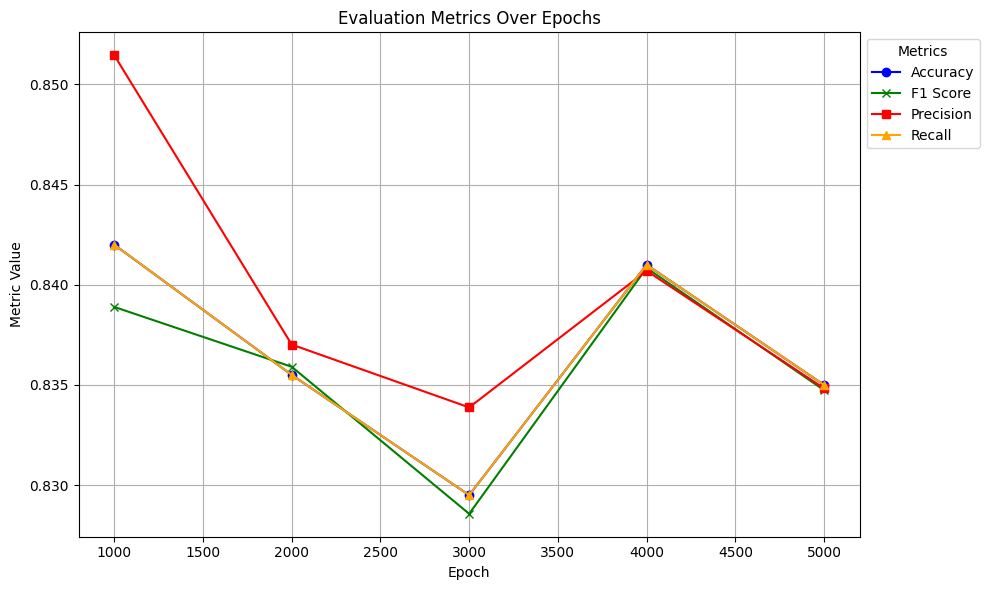

In [95]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to extract metrics and adjust the epoch values
def extract_metrics(event_file):
    metrics = {
        'epoch': [],
        'eval_accuracy': [],
        'eval_f1': [],
        'eval_precision': [],
        'eval_recall': []
    }

    # Iterate over the event file and extract the metrics
    for summary in tf.compat.v1.train.summary_iterator(event_file):
        for value in summary.summary.value:
            if value.tag == 'eval/accuracy':
                # Adjust the epoch step (if it's scaled by 1000 or another factor)
                metrics['epoch'].append(summary.step)  # Keep epoch as it is
                metrics['eval_accuracy'].append(value.simple_value)
            elif value.tag == 'eval/f1':
                metrics['eval_f1'].append(value.simple_value)
            elif value.tag == 'eval/precision':
                metrics['eval_precision'].append(value.simple_value)
            elif value.tag == 'eval/recall':
                metrics['eval_recall'].append(value.simple_value)

    return metrics

# Specify the correct path to the event file
event_file = r'C:/Users/PC/Desktop/IAT 360 MENTAL HEALTH/logs/events.out.tfevents.1733471271.DESKTOP-VU0CKF5.29384.11'

# Extract the metrics from the event file
metrics = extract_metrics(event_file)

# Filter metrics for the first 5 epochs (if available)
epochs_to_show = 5
epochs_filtered = {
    'epoch': metrics['epoch'][:epochs_to_show],
    'eval_accuracy': metrics['eval_accuracy'][:epochs_to_show],
    'eval_f1': metrics['eval_f1'][:epochs_to_show],
    'eval_precision': metrics['eval_precision'][:epochs_to_show],
    'eval_recall': metrics['eval_recall'][:epochs_to_show]
}

# Display the filtered metrics
for i in range(epochs_to_show):
    print(f"Epoch {epochs_filtered['epoch'][i]}:")
    print(f"  Accuracy: {epochs_filtered['eval_accuracy'][i]:.4f}")
    print(f"  F1 Score: {epochs_filtered['eval_f1'][i]:.4f}")
    print(f"  Precision: {epochs_filtered['eval_precision'][i]:.4f}")
    print(f"  Recall: {epochs_filtered['eval_recall'][i]:.4f}")
    print("-" * 30)

# Plot the extracted metrics for the first 5 epochs
plt.figure(figsize=(10, 6))

# Plot each metric with different styles
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_accuracy'], label='Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_f1'], label='F1 Score', color='green', linestyle='-', marker='x')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_precision'], label='Precision', color='red', linestyle='-', marker='s')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_recall'], label='Recall', color='orange', linestyle='-', marker='^')

# Label axes and title
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Over Epochs')

# Add the legend to the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Metrics")

# Enable grid for better readability
plt.grid(True)

# Adjust the layout so the legend does not overlap
plt.tight_layout()

# Display the plot
plt.show()


In [77]:
import os
import numpy as np
from sklearn.model_selection import KFold
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,  # Increased epochs for better training (adjust based on performance)
    per_device_train_batch_size=16,  # Batch size
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=2e-5,  # Learning rate to start with
    weight_decay=0.01,  # Apply weight decay for regularization
    max_grad_norm=1.0,  # Gradient clipping to prevent exploding gradients
    metric_for_best_model='eval_loss',  # Metric to track for saving the best model
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=5)  # Stop after 5 epochs with no improvement

# Split the dataset into k folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Track the results for each fold
fold_results = []

# Perform k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"\nTraining fold {fold + 1}/{kf.get_n_splits()}...")

    # Split the dataset into train and validation for this fold
    train_fold = train_dataset.select(train_idx)
    val_fold = train_dataset.select(val_idx)

    # Trainer setup for the current fold
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_fold,  # Training dataset for the fold
        eval_dataset=val_fold,  # Validation dataset for the fold
        tokenizer=tokenizer,  # Ensure tokenizer is defined
        compute_metrics=compute_metrics,
        callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
    )

    # Train the model for this fold
    trainer.train()

    # Evaluate the model for this fold
    eval_results = trainer.evaluate()
    fold_results.append(eval_results)

    # Print fold results
    print(f"Results for fold {fold + 1}: {eval_results}")

# Calculate the average results across all folds
avg_results = {metric: np.mean([result[metric] for result in fold_results]) for metric in fold_results[0]}
print("\nAverage results across all folds:", avg_results)

# Optionally, save the final model after training all folds
trainer.save_model("./final_model")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3535173399.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Training fold 1/5...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.455000,0.450050,0.815625,0.809040,0.828796,0.815625
2,0.342500,0.446247,0.828125,0.829151,0.831418,0.828125
3,0.297100,0.475210,0.832500,0.828058,0.839095,0.832500
4,0.211300,0.495223,0.842187,0.841147,0.842975,0.842187
5,0.144400,0.543992,0.840938,0.839359,0.840339,0.840938


Epoch 1.0 finished at 2024-12-06 00:38:05 (Step 800)
Checkpoint saved at 2024-12-06 00:38:37 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-06 00:44:38 (Step 1600)
Checkpoint saved at 2024-12-06 00:45:09 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-06 00:51:07 (Step 2400)
Checkpoint saved at 2024-12-06 00:51:39 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-06 00:57:39 (Step 3200)
Checkpoint saved at 2024-12-06 00:58:12 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-06 01:04:31 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-06 01:04:31 (Step 4000)
Checkpoint saved at 2024-12-06 01:05:05 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 1: {'eval_loss': 0.4462469816207886, 'eval_accuracy': 0.828125, 'eval_f1': 0.8291506449716921, 'eval_precision': 0.8314176871955575, 'eval_recall': 0.828125, 'eval_runtime': 32.6206, 'eval_samples_per_second': 98.097, 'eval_steps_per_second': 6.131, 'epoch': 5.0}

Training fold 2/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3535173399.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.371600,0.290316,0.882812,0.882053,0.893317,0.882812
2,0.238100,0.274220,0.892500,0.890900,0.897245,0.892500
3,0.178000,0.337470,0.887813,0.886625,0.896515,0.887813
4,0.120000,0.356366,0.897813,0.897069,0.898205,0.897813
5,0.081700,0.415359,0.893437,0.892952,0.893434,0.893437


Epoch 1.0 finished at 2024-12-06 01:12:00 (Step 800)
Checkpoint saved at 2024-12-06 01:12:34 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-06 01:18:41 (Step 1600)
Checkpoint saved at 2024-12-06 01:19:13 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-06 01:25:21 (Step 2400)
Checkpoint saved at 2024-12-06 01:25:54 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-06 01:32:01 (Step 3200)
Checkpoint saved at 2024-12-06 01:32:33 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-06 01:38:42 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-06 01:38:42 (Step 4000)
Checkpoint saved at 2024-12-06 01:39:15 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 2: {'eval_loss': 0.27422013878822327, 'eval_accuracy': 0.8925, 'eval_f1': 0.8909004427966646, 'eval_precision': 0.8972451877813892, 'eval_recall': 0.8925, 'eval_runtime': 31.0936, 'eval_samples_per_second': 102.915, 'eval_steps_per_second': 6.432, 'epoch': 5.0}

Training fold 3/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3535173399.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.237600,0.139105,0.952187,0.952066,0.952211,0.952187
2,0.144300,0.145957,0.956562,0.956248,0.957622,0.956562
3,0.095700,0.179315,0.955625,0.955669,0.955748,0.955625
4,0.059900,0.211789,0.952812,0.952467,0.954666,0.952812
5,0.032900,0.199313,0.956562,0.956456,0.956763,0.956562


Epoch 1.0 finished at 2024-12-06 01:45:53 (Step 800)
Checkpoint saved at 2024-12-06 01:46:26 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-06 01:52:35 (Step 1600)
Checkpoint saved at 2024-12-06 01:53:07 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-06 01:59:15 (Step 2400)
Checkpoint saved at 2024-12-06 01:59:48 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-06 02:05:57 (Step 3200)
Checkpoint saved at 2024-12-06 02:06:30 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-06 02:12:41 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-06 02:12:41 (Step 4000)
Checkpoint saved at 2024-12-06 02:13:14 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 3: {'eval_loss': 0.13910463452339172, 'eval_accuracy': 0.9521875, 'eval_f1': 0.9520659956874262, 'eval_precision': 0.9522111016810635, 'eval_recall': 0.9521875, 'eval_runtime': 31.4212, 'eval_samples_per_second': 101.842, 'eval_steps_per_second': 6.365, 'epoch': 5.0}

Training fold 4/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3535173399.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.178300,0.123586,0.956875,0.956493,0.960731,0.956875
2,0.127800,0.097993,0.970938,0.970839,0.970853,0.970938
3,0.066600,0.120275,0.972812,0.972695,0.972800,0.972812
4,0.036000,0.123745,0.973750,0.973750,0.973772,0.973750
5,0.016800,0.123628,0.976562,0.976512,0.976576,0.976562


Epoch 1.0 finished at 2024-12-06 02:19:56 (Step 800)
Checkpoint saved at 2024-12-06 02:20:29 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-06 02:26:39 (Step 1600)
Checkpoint saved at 2024-12-06 02:27:12 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-06 02:33:22 (Step 2400)
Checkpoint saved at 2024-12-06 02:33:54 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-06 02:40:04 (Step 3200)
Checkpoint saved at 2024-12-06 02:40:37 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-06 02:46:51 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-06 02:46:51 (Step 4000)
Checkpoint saved at 2024-12-06 02:47:23 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 4: {'eval_loss': 0.09799309819936752, 'eval_accuracy': 0.9709375, 'eval_f1': 0.9708386932577219, 'eval_precision': 0.9708527473995678, 'eval_recall': 0.9709375, 'eval_runtime': 31.3661, 'eval_samples_per_second': 102.021, 'eval_steps_per_second': 6.376, 'epoch': 5.0}

Training fold 5/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3535173399.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.115800,0.039809,0.988125,0.988103,0.988173,0.988125
2,0.071900,0.038576,0.987812,0.987810,0.987979,0.987812
3,0.057200,0.051046,0.988125,0.988117,0.988209,0.988125
4,0.017200,0.053570,0.989688,0.989683,0.989709,0.989688
5,0.012100,0.048432,0.989375,0.989371,0.989375,0.989375


Epoch 1.0 finished at 2024-12-06 02:54:08 (Step 800)
Checkpoint saved at 2024-12-06 02:54:41 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-06 03:00:52 (Step 1600)
Checkpoint saved at 2024-12-06 03:01:25 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-06 03:07:33 (Step 2400)
Checkpoint saved at 2024-12-06 03:08:06 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-06 03:14:16 (Step 3200)
Checkpoint saved at 2024-12-06 03:14:49 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-06 03:21:00 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-06 03:21:00 (Step 4000)
Checkpoint saved at 2024-12-06 03:21:32 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 5: {'eval_loss': 0.038575973361730576, 'eval_accuracy': 0.9878125, 'eval_f1': 0.9878102861743201, 'eval_precision': 0.9879793313206293, 'eval_recall': 0.9878125, 'eval_runtime': 31.3233, 'eval_samples_per_second': 102.16, 'eval_steps_per_second': 6.385, 'epoch': 5.0}

Average results across all folds: {'eval_loss': 0.19922816529870033, 'eval_accuracy': 0.9263124999999999, 'eval_f1': 0.926153212577565, 'eval_precision': 0.9279412110756414, 'eval_recall': 0.9263124999999999, 'eval_runtime': 31.564960000000003, 'eval_samples_per_second': 101.407, 'eval_steps_per_second': 6.3378, 'epoch': 5.0}


kfold log /logs/events.out.tfevents.1733473927.DESKTOP-VU0CKF5.29384.12
12-14

Epoch 800:
  Accuracy: 0.9881
  F1 Score: 0.9881
  Precision: 0.9882
  Recall: 0.9881
------------------------------
Epoch 1600:
  Accuracy: 0.9878
  F1 Score: 0.9878
  Precision: 0.9880
  Recall: 0.9878
------------------------------
Epoch 2400:
  Accuracy: 0.9881
  F1 Score: 0.9881
  Precision: 0.9882
  Recall: 0.9881
------------------------------
Epoch 3200:
  Accuracy: 0.9897
  F1 Score: 0.9897
  Precision: 0.9897
  Recall: 0.9897
------------------------------
Epoch 4000:
  Accuracy: 0.9894
  F1 Score: 0.9894
  Precision: 0.9894
  Recall: 0.9894
------------------------------


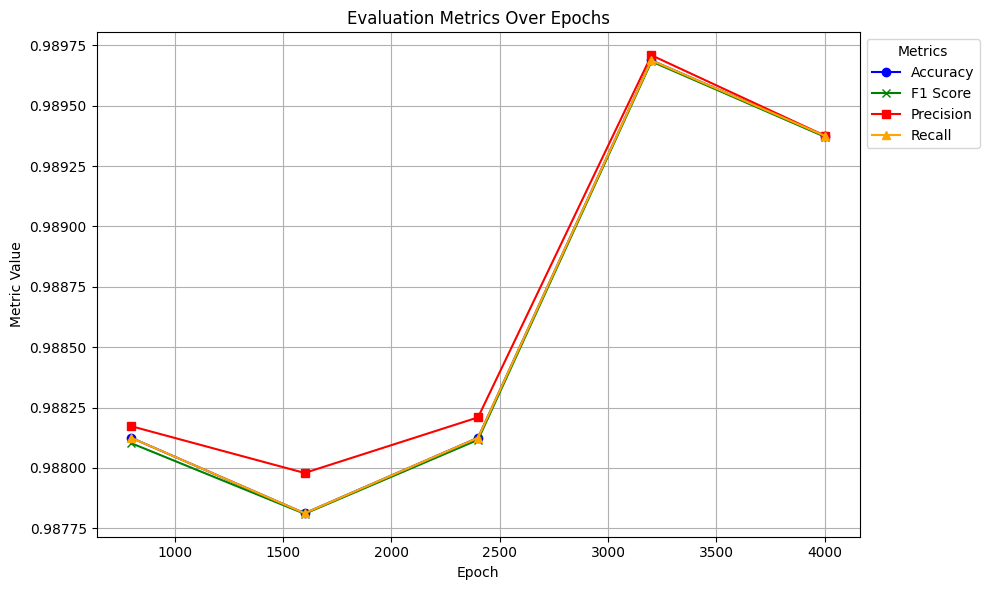

In [94]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to extract metrics and adjust the epoch values
def extract_metrics(event_file):
    metrics = {
        'epoch': [],
        'eval_accuracy': [],
        'eval_f1': [],
        'eval_precision': [],
        'eval_recall': []
    }

    # Iterate over the event file and extract the metrics
    for summary in tf.compat.v1.train.summary_iterator(event_file):
        for value in summary.summary.value:
            if value.tag == 'eval/accuracy':
                # Adjust the epoch step (if it's scaled by 1000 or another factor)
                metrics['epoch'].append(summary.step)  # Keep epoch as it is
                metrics['eval_accuracy'].append(value.simple_value)
            elif value.tag == 'eval/f1':
                metrics['eval_f1'].append(value.simple_value)
            elif value.tag == 'eval/precision':
                metrics['eval_precision'].append(value.simple_value)
            elif value.tag == 'eval/recall':
                metrics['eval_recall'].append(value.simple_value)

    return metrics

# Specify the correct path to the event file
event_file = r'C:/Users/PC/Desktop/IAT 360 MENTAL HEALTH/logs/events.out.tfevents.1733482075.DESKTOP-VU0CKF5.29384.20'

# Extract the metrics from the event file
metrics = extract_metrics(event_file)

# Filter metrics for the first 5 epochs (if available)
epochs_to_show = 5
epochs_filtered = {
    'epoch': metrics['epoch'][:epochs_to_show],
    'eval_accuracy': metrics['eval_accuracy'][:epochs_to_show],
    'eval_f1': metrics['eval_f1'][:epochs_to_show],
    'eval_precision': metrics['eval_precision'][:epochs_to_show],
    'eval_recall': metrics['eval_recall'][:epochs_to_show]
}

# Display the filtered metrics
for i in range(epochs_to_show):
    print(f"Epoch {epochs_filtered['epoch'][i]}:")
    print(f"  Accuracy: {epochs_filtered['eval_accuracy'][i]:.4f}")
    print(f"  F1 Score: {epochs_filtered['eval_f1'][i]:.4f}")
    print(f"  Precision: {epochs_filtered['eval_precision'][i]:.4f}")
    print(f"  Recall: {epochs_filtered['eval_recall'][i]:.4f}")
    print("-" * 30)

# Plot the extracted metrics for the first 5 epochs
plt.figure(figsize=(10, 6))

# Plot each metric with different styles
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_accuracy'], label='Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_f1'], label='F1 Score', color='green', linestyle='-', marker='x')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_precision'], label='Precision', color='red', linestyle='-', marker='s')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_recall'], label='Recall', color='orange', linestyle='-', marker='^')

# Label axes and title
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Over Epochs')

# Add the legend to the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Metrics")

# Enable grid for better readability
plt.grid(True)

# Adjust the layout so the legend does not overlap
plt.tight_layout()

# Display the plot
plt.show()

In [80]:
# Get predictions on the test dataset
test_predictions = trainer.predict(test_dataset)

# Extract logits and actual labels
logits = test_predictions.predictions
labels = test_predictions.label_ids

# Get predicted labels (the index with the highest probability)
predicted_labels = logits.argmax(axis=-1)

# Find misclassified samples
misclassified_indices = (predicted_labels != labels)  # This will give a boolean mask of misclassified samples

# Extract misclassified examples and their corresponding predictions
misclassified_samples = []
for idx in range(len(misclassified_indices)):
    if misclassified_indices[idx]:
        misclassified_samples.append({
            'text': test_dataset[idx]['text'],  # assuming your dataset has a 'text' field
            'true_label': labels[idx],
            'predicted_label': predicted_labels[idx]
        })

# Print or log the misclassified examples
for sample in misclassified_samples:
    print(f"Text: {sample['text']}")
    print(f"True Label: {sample['true_label']} -> {id2label[sample['true_label']]}")
    print(f"Predicted Label: {sample['predicted_label']} -> {id2label[sample['predicted_label']]}")
    print("-" * 50)

Text: I am so upset and I hate myself I want to fucking die I feel worthless and nobody is awake to talk to me and I just want somebody to listen to me or talk to me or something I just want to pretend what I say is important to somebody even if just for a few minutes please Please can anybody talk to me
True Label: 2 -> Depression
Predicted Label: 0 -> Suicidal
--------------------------------------------------
Text: Already borrowed what I can from family and friends living on my own and rather exhausted that Id rather not share my specific adress in public so PM if you want to help Got no preferences but a kebab or pizza with varied stuff in it would be great for nutrition Hate asking for this but Im at a low point and getting rather desperate If ordering isnt the thing for you a small amount of money to buy something cheap at the store is just as good
True Label: 1 -> Anxiety/Stress
Predicted Label: 3 -> Normal
--------------------------------------------------
Text: gimmethefife N

In [82]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Define the checkpoint path to the saved model
checkpoint_path = './final_model'  # or another checkpoint folder

# Load the model and tokenizer from the saved directory
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_path)
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)

In [92]:
from transformers import pipeline
import torch

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1

# Create the pipeline for sentiment analysis with the device argument
sentiment_classifier = pipeline(task='sentiment-analysis', model=model, tokenizer=tokenizer, device=device)

# Now you can use the model to make predictions
paragraph = "I have been thinking about it a lot lately it is so simple Walk up to a cop and just try to fight him and try to get him to shoot you These thoughts see very intrusive for me but also suicidal thoughts in general For example I went camping over the weekend and I just kept thinking about shoving my face into the fire I do not know why It probably would not even kill me and it would be very painful But the thoughts do not go away They never do Suicide via cop"
result = sentiment_classifier(paragraph)

print(result)

[{'label': 'Suicidal', 'score': 0.9983668923377991}]


In [107]:
from collections import Counter

# Extract labels directly from the 'status' field
train_labels = [example['status'] for example in train_dataset]
val_labels = [example['status'] for example in validation_dataset]
test_labels = [example['status'] for example in test_dataset]

print("Training Class Distribution:", Counter(train_labels))
print("Validation Class Distribution:", Counter(val_labels))
print("Test Class Distribution:", Counter(test_labels))

Training Class Distribution: Counter({0: 4000, 1: 4000, 2: 4000, 3: 4000})
Validation Class Distribution: Counter({0: 500, 3: 500, 1: 500, 2: 500})
Test Class Distribution: Counter({2: 500, 0: 500, 3: 500, 1: 500})


##NEW TRAINING WITH THE UPDATED TEST FOLDERIN PLACE##

In [123]:
print("Test dataset info:")
print(test_dataset)

Test dataset info:
Dataset({
    features: ['text', 'status', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 2040
})


In [122]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime
# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=1,  # Adjust number of epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\1871702778.py:82: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.416100,0.411459,0.838000,0.836081,0.840905,0.838000


TrainOutput(global_step=1000, training_loss=0.5320137977600098, metrics={'train_runtime': 465.0727, 'train_samples_per_second': 34.403, 'train_steps_per_second': 2.15, 'total_flos': 2119553974272000.0, 'train_loss': 0.5320137977600098, 'epoch': 1.0})

log for this is /logs/events.out.tfevents.1733632068.DESKTOP-VU0CKF5.29384.22

In [124]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,  # Increased epochs for better training (adjust based on performance)
    per_device_train_batch_size=16,  # Batch size
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=5e-5,  # Learning rate to start with
    weight_decay=0.01,  # Apply weight decay for regularization
    max_grad_norm=1.0,  # Gradient clipping to prevent exploding gradients
    metric_for_best_model='eval_loss',  # Metric to track for saving the best model
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=5)  # Stop after 5 epochs with no improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3817304102.py:90: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.439100,0.426019,0.826000,0.821219,0.840705,0.826000
2,0.316800,0.434222,0.833000,0.833418,0.836790,0.833000
3,0.228400,0.444831,0.850000,0.848506,0.849274,0.850000
4,0.144100,0.621923,0.841000,0.840439,0.841867,0.841000
5,0.086900,0.735312,0.837500,0.836799,0.836405,0.837500


Epoch 1.0 finished at 2024-12-07 20:53:31 (Step 1000)
Checkpoint saved at 2024-12-07 20:53:52 (Step 1000)
Checkpoint directory: ./results\checkpoint-1000
Epoch 2.0 finished at 2024-12-07 21:01:24 (Step 2000)
Checkpoint saved at 2024-12-07 21:01:47 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 3.0 finished at 2024-12-07 21:09:15 (Step 3000)
Checkpoint saved at 2024-12-07 21:09:36 (Step 3000)
Checkpoint directory: ./results\checkpoint-3000
Epoch 4.0 finished at 2024-12-07 21:17:04 (Step 4000)
Checkpoint saved at 2024-12-07 21:17:25 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Checkpoint saved at 2024-12-07 21:24:52 (Step 5000)
Checkpoint directory: ./results\checkpoint-5000
Epoch 5.0 finished at 2024-12-07 21:24:52 (Step 5000)
Checkpoint saved at 2024-12-07 21:25:13 (Step 5000)
Checkpoint directory: ./results\checkpoint-5000


TrainOutput(global_step=5000, training_loss=0.26904352073669435, metrics={'train_runtime': 2346.9124, 'train_samples_per_second': 34.087, 'train_steps_per_second': 2.13, 'total_flos': 1.059776987136e+16, 'train_loss': 0.26904352073669435, 'epoch': 5.0})

log for this is /logs/events.out.tfevents.1733633166.DESKTOP-VU0CKF5.29384.23

Epoch 1000:
  Accuracy: 0.8260
  F1 Score: 0.8212
  Precision: 0.8407
  Recall: 0.8260
------------------------------
Epoch 2000:
  Accuracy: 0.8330
  F1 Score: 0.8334
  Precision: 0.8368
  Recall: 0.8330
------------------------------
Epoch 3000:
  Accuracy: 0.8500
  F1 Score: 0.8485
  Precision: 0.8493
  Recall: 0.8500
------------------------------
Epoch 4000:
  Accuracy: 0.8410
  F1 Score: 0.8404
  Precision: 0.8419
  Recall: 0.8410
------------------------------
Epoch 5000:
  Accuracy: 0.8375
  F1 Score: 0.8368
  Precision: 0.8364
  Recall: 0.8375
------------------------------


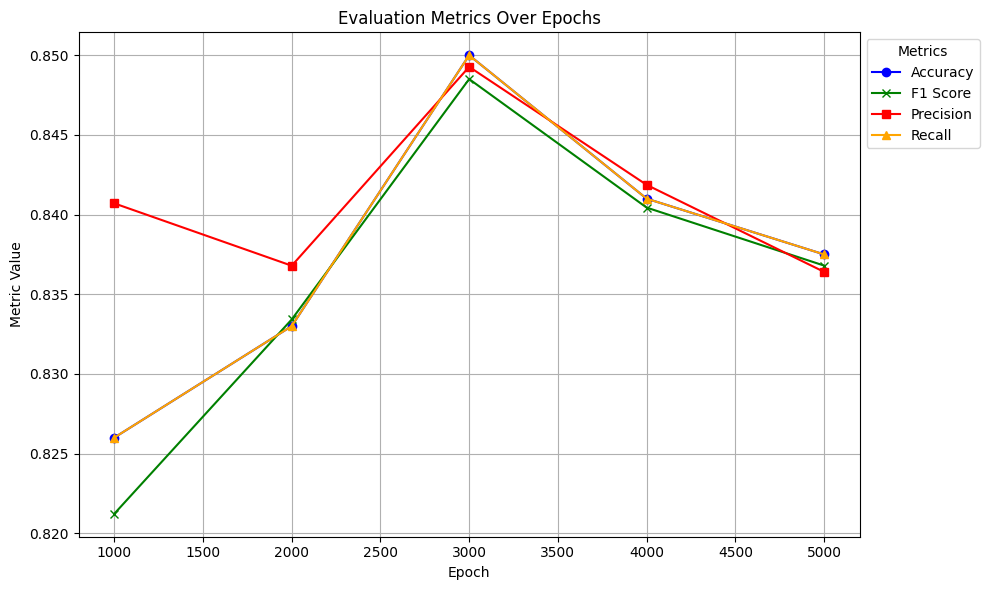

In [125]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to extract metrics and adjust the epoch values
def extract_metrics(event_file):
    metrics = {
        'epoch': [],
        'eval_accuracy': [],
        'eval_f1': [],
        'eval_precision': [],
        'eval_recall': []
    }

    # Iterate over the event file and extract the metrics
    for summary in tf.compat.v1.train.summary_iterator(event_file):
        for value in summary.summary.value:
            if value.tag == 'eval/accuracy':
                # Adjust the epoch step (if it's scaled by 1000 or another factor)
                metrics['epoch'].append(summary.step)  # Keep epoch as it is
                metrics['eval_accuracy'].append(value.simple_value)
            elif value.tag == 'eval/f1':
                metrics['eval_f1'].append(value.simple_value)
            elif value.tag == 'eval/precision':
                metrics['eval_precision'].append(value.simple_value)
            elif value.tag == 'eval/recall':
                metrics['eval_recall'].append(value.simple_value)

    return metrics

# Specify the correct path to the event file
event_file = r'C:/Users/PC/Desktop/IAT 360 MENTAL HEALTH/logs/events.out.tfevents.1733633166.DESKTOP-VU0CKF5.29384.23'

# Extract the metrics from the event file
metrics = extract_metrics(event_file)

# Filter metrics for the first 5 epochs (if available)
epochs_to_show = 5
epochs_filtered = {
    'epoch': metrics['epoch'][:epochs_to_show],
    'eval_accuracy': metrics['eval_accuracy'][:epochs_to_show],
    'eval_f1': metrics['eval_f1'][:epochs_to_show],
    'eval_precision': metrics['eval_precision'][:epochs_to_show],
    'eval_recall': metrics['eval_recall'][:epochs_to_show]
}

# Display the filtered metrics
for i in range(epochs_to_show):
    print(f"Epoch {epochs_filtered['epoch'][i]}:")
    print(f"  Accuracy: {epochs_filtered['eval_accuracy'][i]:.4f}")
    print(f"  F1 Score: {epochs_filtered['eval_f1'][i]:.4f}")
    print(f"  Precision: {epochs_filtered['eval_precision'][i]:.4f}")
    print(f"  Recall: {epochs_filtered['eval_recall'][i]:.4f}")
    print("-" * 30)

# Plot the extracted metrics for the first 5 epochs
plt.figure(figsize=(10, 6))

# Plot each metric with different styles
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_accuracy'], label='Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_f1'], label='F1 Score', color='green', linestyle='-', marker='x')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_precision'], label='Precision', color='red', linestyle='-', marker='s')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_recall'], label='Recall', color='orange', linestyle='-', marker='^')

# Label axes and title
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Over Epochs')

# Add the legend to the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Metrics")

# Enable grid for better readability
plt.grid(True)

# Adjust the layout so the legend does not overlap
plt.tight_layout()

# Display the plot
plt.show()

In [126]:
import os
import numpy as np
from sklearn.model_selection import KFold
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,  # Increased epochs for better training (adjust based on performance)
    per_device_train_batch_size=16,  # Batch size
    per_device_eval_batch_size=16,
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=2e-5,  # Learning rate to start with
    weight_decay=0.01,  # Apply weight decay for regularization
    max_grad_norm=1.0,  # Gradient clipping to prevent exploding gradients
    metric_for_best_model='eval_loss',  # Metric to track for saving the best model
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=5)  # Stop after 5 epochs with no improvement

# Split the dataset into k folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Track the results for each fold
fold_results = []

# Perform k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"\nTraining fold {fold + 1}/{kf.get_n_splits()}...")

    # Split the dataset into train and validation for this fold
    train_fold = train_dataset.select(train_idx)
    val_fold = train_dataset.select(val_idx)

    # Trainer setup for the current fold
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_fold,  # Training dataset for the fold
        eval_dataset=val_fold,  # Validation dataset for the fold
        tokenizer=tokenizer,  # Ensure tokenizer is defined
        compute_metrics=compute_metrics,
        callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
    )

    # Train the model for this fold
    trainer.train()

    # Evaluate the model for this fold
    eval_results = trainer.evaluate()
    fold_results.append(eval_results)

    # Print fold results
    print(f"Results for fold {fold + 1}: {eval_results}")

# Calculate the average results across all folds
avg_results = {metric: np.mean([result[metric] for result in fold_results]) for metric in fold_results[0]}
print("\nAverage results across all folds:", avg_results)

# Optionally, save the final model after training all folds
trainer.save_model("./final_model_updated")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2703265944.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Training fold 1/5...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.451100,0.434816,0.825000,0.821776,0.834952,0.825000
2,0.340100,0.443910,0.826875,0.827705,0.830646,0.826875
3,0.286100,0.474796,0.835938,0.832689,0.843962,0.835938
4,0.200100,0.480374,0.847187,0.846649,0.847187,0.847187
5,0.139900,0.525607,0.841875,0.840708,0.841561,0.841875


Epoch 1.0 finished at 2024-12-07 21:36:49 (Step 800)
Checkpoint saved at 2024-12-07 21:37:21 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-07 21:43:19 (Step 1600)
Checkpoint saved at 2024-12-07 21:43:50 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-07 21:49:48 (Step 2400)
Checkpoint saved at 2024-12-07 21:50:20 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-07 21:56:29 (Step 3200)
Checkpoint saved at 2024-12-07 21:57:01 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-07 22:03:20 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-07 22:03:20 (Step 4000)
Checkpoint saved at 2024-12-07 22:03:53 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 1: {'eval_loss': 0.43481606245040894, 'eval_accuracy': 0.825, 'eval_f1': 0.8217755609347396, 'eval_precision': 0.834951556693576, 'eval_recall': 0.825, 'eval_runtime': 30.5205, 'eval_samples_per_second': 104.847, 'eval_steps_per_second': 6.553, 'epoch': 5.0}

Training fold 2/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2703265944.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.421000,0.375330,0.846250,0.844355,0.861001,0.846250
2,0.290900,0.347026,0.858750,0.856528,0.866409,0.858750
3,0.220500,0.411212,0.857500,0.856132,0.865355,0.857500
4,0.143900,0.447459,0.860938,0.860448,0.860357,0.860938
5,0.113600,0.524549,0.860000,0.859528,0.859746,0.860000


Epoch 1.0 finished at 2024-12-07 22:10:21 (Step 800)
Checkpoint saved at 2024-12-07 22:10:53 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-07 22:16:50 (Step 1600)
Checkpoint saved at 2024-12-07 22:17:22 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-07 22:23:20 (Step 2400)
Checkpoint saved at 2024-12-07 22:23:51 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-07 22:29:50 (Step 3200)
Checkpoint saved at 2024-12-07 22:30:22 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-07 22:36:21 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-07 22:36:21 (Step 4000)
Checkpoint saved at 2024-12-07 22:36:53 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 2: {'eval_loss': 0.347025990486145, 'eval_accuracy': 0.85875, 'eval_f1': 0.8565283643729102, 'eval_precision': 0.8664086054455074, 'eval_recall': 0.85875, 'eval_runtime': 30.413, 'eval_samples_per_second': 105.218, 'eval_steps_per_second': 6.576, 'epoch': 5.0}

Training fold 3/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2703265944.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.288200,0.216682,0.920000,0.920054,0.920522,0.920000
2,0.174300,0.238764,0.921250,0.920049,0.928460,0.921250
3,0.114500,0.298233,0.916875,0.916837,0.917550,0.916875
4,0.089500,0.309286,0.919063,0.918798,0.919083,0.919063
5,0.046200,0.341162,0.922500,0.922262,0.922424,0.922500


Epoch 1.0 finished at 2024-12-07 22:43:23 (Step 800)
Checkpoint saved at 2024-12-07 22:43:55 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-07 22:49:52 (Step 1600)
Checkpoint saved at 2024-12-07 22:50:24 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-07 22:56:21 (Step 2400)
Checkpoint saved at 2024-12-07 22:56:53 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-07 23:02:50 (Step 3200)
Checkpoint saved at 2024-12-07 23:03:22 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-07 23:09:21 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-07 23:09:21 (Step 4000)
Checkpoint saved at 2024-12-07 23:09:53 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 3: {'eval_loss': 0.21668215095996857, 'eval_accuracy': 0.92, 'eval_f1': 0.9200535159653718, 'eval_precision': 0.9205216620280464, 'eval_recall': 0.92, 'eval_runtime': 30.3481, 'eval_samples_per_second': 105.443, 'eval_steps_per_second': 6.59, 'epoch': 5.0}

Training fold 4/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2703265944.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.214000,0.129092,0.955000,0.954746,0.955189,0.955000
2,0.138600,0.154348,0.950625,0.950487,0.950433,0.950625
3,0.104500,0.147783,0.958750,0.958592,0.958787,0.958750
4,0.077100,0.190655,0.953750,0.953591,0.953475,0.953750
5,0.051700,0.192689,0.956562,0.956427,0.956344,0.956562


Epoch 1.0 finished at 2024-12-07 23:16:22 (Step 800)
Checkpoint saved at 2024-12-07 23:16:53 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-07 23:22:51 (Step 1600)
Checkpoint saved at 2024-12-07 23:23:23 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-07 23:29:20 (Step 2400)
Checkpoint saved at 2024-12-07 23:29:52 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-07 23:35:49 (Step 3200)
Checkpoint saved at 2024-12-07 23:36:21 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-07 23:42:20 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-07 23:42:20 (Step 4000)
Checkpoint saved at 2024-12-07 23:42:51 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 4: {'eval_loss': 0.1290915459394455, 'eval_accuracy': 0.955, 'eval_f1': 0.9547463287680448, 'eval_precision': 0.9551890420493107, 'eval_recall': 0.955, 'eval_runtime': 30.2757, 'eval_samples_per_second': 105.695, 'eval_steps_per_second': 6.606, 'epoch': 5.0}

Training fold 5/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2703265944.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.145900,0.090423,0.972500,0.972491,0.972626,0.972500
2,0.091500,0.095394,0.972812,0.972778,0.972847,0.972812
3,0.075900,0.105548,0.974688,0.974691,0.975542,0.974688
4,0.023000,0.124482,0.973750,0.973710,0.973807,0.973750
5,0.018400,0.122063,0.975625,0.975617,0.975686,0.975625


Epoch 1.0 finished at 2024-12-07 23:49:20 (Step 800)
Checkpoint saved at 2024-12-07 23:49:52 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 2.0 finished at 2024-12-07 23:55:49 (Step 1600)
Checkpoint saved at 2024-12-07 23:56:21 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Epoch 3.0 finished at 2024-12-08 00:02:19 (Step 2400)
Checkpoint saved at 2024-12-08 00:02:51 (Step 2400)
Checkpoint directory: ./results\checkpoint-2400
Epoch 4.0 finished at 2024-12-08 00:08:48 (Step 3200)
Checkpoint saved at 2024-12-08 00:09:20 (Step 3200)
Checkpoint directory: ./results\checkpoint-3200
Checkpoint saved at 2024-12-08 00:15:19 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-08 00:15:19 (Step 4000)
Checkpoint saved at 2024-12-08 00:15:51 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


Results for fold 5: {'eval_loss': 0.09042306989431381, 'eval_accuracy': 0.9725, 'eval_f1': 0.9724907693080966, 'eval_precision': 0.9726257367714964, 'eval_recall': 0.9725, 'eval_runtime': 30.3305, 'eval_samples_per_second': 105.504, 'eval_steps_per_second': 6.594, 'epoch': 5.0}

Average results across all folds: {'eval_loss': 0.24360776394605638, 'eval_accuracy': 0.90625, 'eval_f1': 0.9051189078698327, 'eval_precision': 0.9099393205975874, 'eval_recall': 0.90625, 'eval_runtime': 30.37756, 'eval_samples_per_second': 105.3414, 'eval_steps_per_second': 6.583800000000001, 'epoch': 5.0}


log start with /logs/events.out.tfevents.1733635854.DESKTOP-VU0CKF5.29384.24

to32 log

In [127]:
import os
import numpy as np
from sklearn.model_selection import KFold
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate for metrics
from transformers import EarlyStoppingCallback
from datetime import datetime

# Custom Callback for Logging
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use pre-tokenized datasets
train_dataset = tokenized_train
validation_dataset = tokenized_validation
test_dataset = tokenized_test

# Define the model checkpoint
checkpoint = 'distilbert-base-uncased'

# Dynamically generate label mappings
labels = train_dataset.features['status'].names
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Training Arguments
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=2e-5,
    weight_decay=0.01,
    max_grad_norm=1.0,
    metric_for_best_model='eval_f1',  # Use F1 score for determining the best model
    greater_is_better=True,  # Higher F1 score is better
)

# Early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=5)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"\nTraining fold {fold + 1}/{kf.get_n_splits()}...")

    # Initialize a new model for each fold
    model = AutoModelForSequenceClassification.from_pretrained(
        checkpoint,
        num_labels=len(labels),
        id2label=id2label,
        label2id=label2id
    )

    # Prepare fold-specific datasets
    train_fold = train_dataset.select(train_idx)
    val_fold = train_dataset.select(val_idx)

    # Trainer setup
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_fold,
        eval_dataset=val_fold,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
        callbacks=[early_stopping_callback, TimeLoggingCallback()]
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_results = trainer.evaluate()
    fold_results.append(eval_results)

    # Print fold results
    print(f"Results for fold {fold + 1}: {eval_results}")

# Calculate average results across folds
avg_results = {metric: np.mean([result[metric] for result in fold_results]) for metric in fold_results[0]}
print("\nAverage results across all folds:", avg_results)

# Save the final model
trainer.save_model("./final_model_updated_v2")

# Optionally, test on the independent test dataset
final_eval_results = trainer.evaluate(test_dataset)
print("\nEvaluation on Test Dataset:", final_eval_results)


Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).



Training fold 1/5...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\11757155.py:102: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.491000,0.456902,0.818750,0.815118,0.826255,0.818750
2,0.395800,0.425728,0.829688,0.828374,0.831892,0.829688
3,0.313200,0.438958,0.831250,0.826814,0.840545,0.831250
4,0.238700,0.433003,0.840313,0.839179,0.839432,0.840313
5,0.198700,0.453132,0.839063,0.837354,0.838302,0.839063


Epoch 1.0 finished at 2024-12-08 00:41:30 (Step 400)
Checkpoint saved at 2024-12-08 00:42:03 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 00:48:01 (Step 800)
Checkpoint saved at 2024-12-08 00:48:35 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 00:54:31 (Step 1200)
Checkpoint saved at 2024-12-08 00:55:05 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 01:01:01 (Step 1600)
Checkpoint saved at 2024-12-08 01:01:35 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 01:07:33 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 01:07:33 (Step 2000)
Checkpoint saved at 2024-12-08 01:08:07 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Results for fold 1: {'eval_loss': 0.43300339579582214, 'eval_accuracy': 0.8403125, 'eval_f1': 0.8391793592648823, 'eval_precision': 0.8394318485794042, 'eval_recall': 0.8403125, 'eval_runtime': 31.8276, 'eval_samples_per_second': 100.542, 'eval_steps_per_second': 3.142, 'epoch': 5.0}

Training fold 2/5...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\11757155.py:102: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.522000,0.481388,0.802813,0.794194,0.817839,0.802813
2,0.388900,0.423858,0.831875,0.828790,0.832768,0.831875
3,0.320900,0.424525,0.831250,0.829281,0.836429,0.831250
4,0.258100,0.431824,0.832187,0.829759,0.832132,0.832187
5,0.217500,0.447603,0.830625,0.829279,0.830128,0.830625


Epoch 1.0 finished at 2024-12-08 01:14:37 (Step 400)
Checkpoint saved at 2024-12-08 01:15:11 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 01:21:08 (Step 800)
Checkpoint saved at 2024-12-08 01:21:41 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 01:27:39 (Step 1200)
Checkpoint saved at 2024-12-08 01:28:13 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 01:34:11 (Step 1600)
Checkpoint saved at 2024-12-08 01:34:45 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 01:40:43 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 01:40:43 (Step 2000)
Checkpoint saved at 2024-12-08 01:41:17 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Results for fold 2: {'eval_loss': 0.43182432651519775, 'eval_accuracy': 0.8321875, 'eval_f1': 0.8297594597028974, 'eval_precision': 0.8321321052402528, 'eval_recall': 0.8321875, 'eval_runtime': 31.8749, 'eval_samples_per_second': 100.393, 'eval_steps_per_second': 3.137, 'epoch': 5.0}

Training fold 3/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\11757155.py:102: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.496000,0.465530,0.811875,0.809890,0.809871,0.811875
2,0.386000,0.481867,0.812187,0.801326,0.831003,0.812187
3,0.299400,0.457826,0.816250,0.815606,0.820466,0.816250
4,0.262900,0.449062,0.833125,0.831846,0.833438,0.833125
5,0.209300,0.470328,0.831875,0.830588,0.830734,0.831875


Epoch 1.0 finished at 2024-12-08 01:47:47 (Step 400)
Checkpoint saved at 2024-12-08 01:48:21 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 01:54:25 (Step 800)
Checkpoint saved at 2024-12-08 01:54:59 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 02:01:10 (Step 1200)
Checkpoint saved at 2024-12-08 02:01:44 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 02:07:46 (Step 1600)
Checkpoint saved at 2024-12-08 02:08:20 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 02:14:24 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 02:14:24 (Step 2000)
Checkpoint saved at 2024-12-08 02:14:58 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Results for fold 3: {'eval_loss': 0.44906166195869446, 'eval_accuracy': 0.833125, 'eval_f1': 0.8318464122818235, 'eval_precision': 0.8334375860951316, 'eval_recall': 0.833125, 'eval_runtime': 32.423, 'eval_samples_per_second': 98.695, 'eval_steps_per_second': 3.084, 'epoch': 5.0}

Training fold 4/5...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\11757155.py:102: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.490500,0.489385,0.805625,0.801842,0.803547,0.805625
2,0.395400,0.448605,0.817187,0.816025,0.820226,0.817187
3,0.298200,0.435681,0.834688,0.834209,0.835051,0.834688
4,0.246100,0.459486,0.838750,0.838114,0.838761,0.838750
5,0.199800,0.476225,0.831875,0.831328,0.831295,0.831875


Epoch 1.0 finished at 2024-12-08 02:21:34 (Step 400)
Checkpoint saved at 2024-12-08 02:22:08 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 02:28:06 (Step 800)
Checkpoint saved at 2024-12-08 02:28:39 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 02:34:36 (Step 1200)
Checkpoint saved at 2024-12-08 02:35:09 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 02:41:06 (Step 1600)
Checkpoint saved at 2024-12-08 02:41:40 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 02:47:38 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 02:47:38 (Step 2000)
Checkpoint saved at 2024-12-08 02:48:12 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Results for fold 4: {'eval_loss': 0.45948609709739685, 'eval_accuracy': 0.83875, 'eval_f1': 0.8381143978500103, 'eval_precision': 0.8387610164255749, 'eval_recall': 0.83875, 'eval_runtime': 32.1296, 'eval_samples_per_second': 99.597, 'eval_steps_per_second': 3.112, 'epoch': 5.0}

Training fold 5/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\11757155.py:102: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.501900,0.492398,0.800625,0.794797,0.815673,0.800625
2,0.381700,0.443420,0.826250,0.822995,0.824864,0.826250
3,0.315900,0.429099,0.829063,0.826861,0.829173,0.829063
4,0.254500,0.465143,0.820312,0.817425,0.829924,0.820312
5,0.214000,0.467079,0.822187,0.820875,0.821893,0.822187


Epoch 1.0 finished at 2024-12-08 02:54:42 (Step 400)
Checkpoint saved at 2024-12-08 02:55:15 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 03:01:12 (Step 800)
Checkpoint saved at 2024-12-08 03:01:46 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 03:07:43 (Step 1200)
Checkpoint saved at 2024-12-08 03:08:16 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 03:14:13 (Step 1600)
Checkpoint saved at 2024-12-08 03:14:46 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 03:20:45 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 03:20:45 (Step 2000)
Checkpoint saved at 2024-12-08 03:21:18 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Results for fold 5: {'eval_loss': 0.4290987253189087, 'eval_accuracy': 0.8290625, 'eval_f1': 0.8268614885094923, 'eval_precision': 0.8291731876369681, 'eval_recall': 0.8290625, 'eval_runtime': 32.0622, 'eval_samples_per_second': 99.806, 'eval_steps_per_second': 3.119, 'epoch': 5.0}

Average results across all folds: {'eval_loss': 0.44049484133720396, 'eval_accuracy': 0.8346875, 'eval_f1': 0.8331522235218211, 'eval_precision': 0.8345871487954664, 'eval_recall': 0.8346875, 'eval_runtime': 32.06346, 'eval_samples_per_second': 99.80659999999999, 'eval_steps_per_second': 3.1188, 'epoch': 5.0}

Evaluation on Test Dataset: {'eval_loss': 0.4338289201259613, 'eval_accuracy': 0.8426470588235294, 'eval_f1': 0.8413078171325639, 'eval_precision': 0.8423587966922841, 'eval_recall': 0.8426470588235294, 'eval_runtime': 20.4223, 'eval_samples_per_second': 99.891, 'eval_steps_per_second': 3.134, 'epoch': 5.0}


log start at /logs/events.out.tfevents.1733646934.DESKTOP-VU0CKF5.29384.34

In [135]:
import os
import numpy as np
from sklearn.model_selection import KFold
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate for metrics
from transformers import EarlyStoppingCallback
from datetime import datetime

# Custom Callback for Logging
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use pre-tokenized datasets
train_dataset = tokenized_train
validation_dataset = tokenized_validation
test_dataset = tokenized_test

# Define the model checkpoint
checkpoint = 'distilbert-base-uncased'

# Dynamically generate label mappings
labels = train_dataset.features['status'].names
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Training Arguments
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=2e-5,
    weight_decay=0.01,
    max_grad_norm=1.0,
    metric_for_best_model='eval_loss',  # Metric to track for saving the best model
)

# Early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=5)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"\nTraining fold {fold + 1}/{kf.get_n_splits()}...")

    # Initialize a new model for each fold
    model = AutoModelForSequenceClassification.from_pretrained(
        checkpoint,
        num_labels=len(labels),
        id2label=id2label,
        label2id=label2id
    )

    # Prepare fold-specific datasets
    train_fold = train_dataset.select(train_idx)
    val_fold = train_dataset.select(val_idx)

    # Trainer setup
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_fold,
        eval_dataset=val_fold,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
        callbacks=[early_stopping_callback, TimeLoggingCallback()]
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_results = trainer.evaluate()
    fold_results.append(eval_results)

    # Print fold results
    print(f"Results for fold {fold + 1}: {eval_results}")

# Calculate average results across folds
avg_results = {metric: np.mean([result[metric] for result in fold_results]) for metric in fold_results[0]}
print("\nAverage results across all folds:", avg_results)

# Save the final model
trainer.save_model("./final_model_updated_v3")

# Optionally, test on the independent test dataset
final_eval_results = trainer.evaluate(test_dataset)
print("\nEvaluation on Test Dataset:", final_eval_results)

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).



Training fold 1/5...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3676426537.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.492100,0.450471,0.821562,0.817468,0.831191,0.821562
2,0.399300,0.422520,0.833438,0.832034,0.835811,0.833438
3,0.321400,0.437080,0.835313,0.832443,0.843662,0.835313
4,0.247000,0.429383,0.845313,0.844860,0.844891,0.845313
5,0.201200,0.451098,0.841875,0.840172,0.841829,0.841875


Epoch 1.0 finished at 2024-12-08 08:19:02 (Step 400)
Checkpoint saved at 2024-12-08 08:19:36 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 08:25:37 (Step 800)
Checkpoint saved at 2024-12-08 08:26:10 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 08:32:06 (Step 1200)
Checkpoint saved at 2024-12-08 08:32:40 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 08:38:35 (Step 1600)
Checkpoint saved at 2024-12-08 08:39:09 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 08:45:06 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 08:45:06 (Step 2000)
Checkpoint saved at 2024-12-08 08:45:40 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Results for fold 1: {'eval_loss': 0.4225195348262787, 'eval_accuracy': 0.8334375, 'eval_f1': 0.832033978590199, 'eval_precision': 0.8358111687858232, 'eval_recall': 0.8334375, 'eval_runtime': 31.9104, 'eval_samples_per_second': 100.281, 'eval_steps_per_second': 3.134, 'epoch': 5.0}

Training fold 2/5...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3676426537.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.522100,0.480984,0.802813,0.794194,0.817839,0.802813
2,0.389000,0.423899,0.830937,0.827914,0.831819,0.830937
3,0.321000,0.424545,0.831875,0.829955,0.836956,0.831875
4,0.258400,0.431759,0.831562,0.828999,0.831502,0.831562
5,0.217500,0.447720,0.830000,0.828622,0.829525,0.830000


Epoch 1.0 finished at 2024-12-08 08:52:09 (Step 400)
Checkpoint saved at 2024-12-08 08:52:43 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 08:58:39 (Step 800)
Checkpoint saved at 2024-12-08 08:59:12 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 09:05:08 (Step 1200)
Checkpoint saved at 2024-12-08 09:05:41 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 09:11:37 (Step 1600)
Checkpoint saved at 2024-12-08 09:12:10 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 09:18:08 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 09:18:08 (Step 2000)
Checkpoint saved at 2024-12-08 09:18:41 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Results for fold 2: {'eval_loss': 0.42389947175979614, 'eval_accuracy': 0.8309375, 'eval_f1': 0.8279138526569939, 'eval_precision': 0.8318186762181434, 'eval_recall': 0.8309375, 'eval_runtime': 32.0377, 'eval_samples_per_second': 99.882, 'eval_steps_per_second': 3.121, 'epoch': 5.0}

Training fold 3/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3676426537.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.496000,0.465713,0.812187,0.810157,0.810159,0.812187
2,0.386100,0.482652,0.813750,0.802943,0.832927,0.813750
3,0.299200,0.456371,0.817187,0.816612,0.820674,0.817187
4,0.262800,0.449390,0.833125,0.831922,0.833661,0.833125
5,0.209200,0.470321,0.832187,0.830914,0.831042,0.832187


Epoch 1.0 finished at 2024-12-08 09:25:11 (Step 400)
Checkpoint saved at 2024-12-08 09:25:45 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 09:31:50 (Step 800)
Checkpoint saved at 2024-12-08 09:32:24 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 09:38:30 (Step 1200)
Checkpoint saved at 2024-12-08 09:39:05 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 09:45:12 (Step 1600)
Checkpoint saved at 2024-12-08 09:45:46 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 09:51:51 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 09:51:51 (Step 2000)
Checkpoint saved at 2024-12-08 09:52:25 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Results for fold 3: {'eval_loss': 0.4493904113769531, 'eval_accuracy': 0.833125, 'eval_f1': 0.8319218933318518, 'eval_precision': 0.833660813652963, 'eval_recall': 0.833125, 'eval_runtime': 32.5479, 'eval_samples_per_second': 98.317, 'eval_steps_per_second': 3.072, 'epoch': 5.0}

Training fold 4/5...


C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3676426537.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.490100,0.490744,0.803750,0.799912,0.801909,0.803750
2,0.395900,0.449197,0.816250,0.815081,0.819183,0.816250
3,0.298300,0.435954,0.834375,0.833928,0.834737,0.834375
4,0.246000,0.460028,0.837187,0.836532,0.837136,0.837187
5,0.199400,0.476329,0.832500,0.831963,0.831945,0.832500


Epoch 1.0 finished at 2024-12-08 09:59:02 (Step 400)
Checkpoint saved at 2024-12-08 09:59:36 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 10:05:40 (Step 800)
Checkpoint saved at 2024-12-08 10:06:14 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 10:12:17 (Step 1200)
Checkpoint saved at 2024-12-08 10:12:51 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 10:18:54 (Step 1600)
Checkpoint saved at 2024-12-08 10:19:28 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 10:25:33 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 10:25:33 (Step 2000)
Checkpoint saved at 2024-12-08 10:26:07 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Results for fold 4: {'eval_loss': 0.4359537363052368, 'eval_accuracy': 0.834375, 'eval_f1': 0.8339281333715601, 'eval_precision': 0.8347367439729694, 'eval_recall': 0.834375, 'eval_runtime': 32.361, 'eval_samples_per_second': 98.884, 'eval_steps_per_second': 3.09, 'epoch': 5.0}

Training fold 5/5...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3676426537.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.502100,0.491936,0.802188,0.796550,0.816960,0.802188
2,0.381800,0.443707,0.827187,0.823897,0.826040,0.827187
3,0.316100,0.429473,0.828750,0.826471,0.829074,0.828750
4,0.254600,0.465793,0.820625,0.817738,0.830231,0.820625
5,0.214300,0.467662,0.822500,0.821201,0.822192,0.822500


Epoch 1.0 finished at 2024-12-08 10:32:44 (Step 400)
Checkpoint saved at 2024-12-08 10:33:18 (Step 400)
Checkpoint directory: ./results\checkpoint-400
Epoch 2.0 finished at 2024-12-08 10:39:21 (Step 800)
Checkpoint saved at 2024-12-08 10:39:55 (Step 800)
Checkpoint directory: ./results\checkpoint-800
Epoch 3.0 finished at 2024-12-08 10:45:58 (Step 1200)
Checkpoint saved at 2024-12-08 10:46:32 (Step 1200)
Checkpoint directory: ./results\checkpoint-1200
Epoch 4.0 finished at 2024-12-08 10:52:35 (Step 1600)
Checkpoint saved at 2024-12-08 10:53:10 (Step 1600)
Checkpoint directory: ./results\checkpoint-1600
Checkpoint saved at 2024-12-08 10:59:14 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 5.0 finished at 2024-12-08 10:59:14 (Step 2000)
Checkpoint saved at 2024-12-08 10:59:48 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000


Results for fold 5: {'eval_loss': 0.4294726848602295, 'eval_accuracy': 0.82875, 'eval_f1': 0.8264709316456695, 'eval_precision': 0.8290744696778473, 'eval_recall': 0.82875, 'eval_runtime': 32.561, 'eval_samples_per_second': 98.277, 'eval_steps_per_second': 3.071, 'epoch': 5.0}

Average results across all folds: {'eval_loss': 0.43224716782569883, 'eval_accuracy': 0.8321250000000001, 'eval_f1': 0.8304537579192548, 'eval_precision': 0.8330203744615492, 'eval_recall': 0.8321250000000001, 'eval_runtime': 32.2836, 'eval_samples_per_second': 99.1282, 'eval_steps_per_second': 3.0976, 'epoch': 5.0}

Evaluation on Test Dataset: {'eval_loss': 0.43413403630256653, 'eval_accuracy': 0.8406862745098039, 'eval_f1': 0.8392808788357881, 'eval_precision': 0.8405245468576841, 'eval_recall': 0.8406862745098039, 'eval_runtime': 20.7832, 'eval_samples_per_second': 98.156, 'eval_steps_per_second': 3.079, 'epoch': 5.0}


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\946051968.py:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


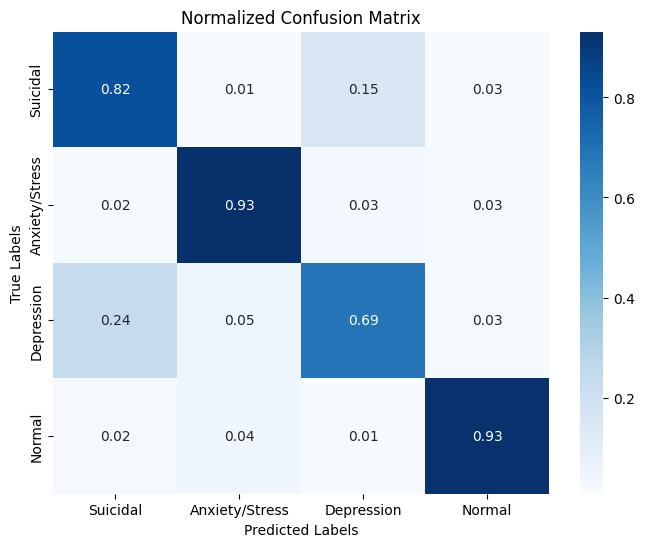

In [137]:
from transformers import TrainingArguments, Trainer
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

# Load the saved model
output_dir = './final_model_updated_v3'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = AutoModelForSequenceClassification.from_pretrained(output_dir)
loaded_model.to(device)  # Explicitly move the model to the correct device

# Reinitialize the Trainer with valid arguments
training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_eval_batch_size=16,  # Example batch size; adjust as needed
    logging_dir='./logs',  # Directory for logs
    evaluation_strategy="no",  # No evaluation during training (can adjust if needed)
)

trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test_dataset,
    tokenizer=tokenizer  # Provide the tokenizer if required
)

# Make predictions
predictions_output = trainer.predict(test_dataset)

# Extract logits and labels
logits = predictions_output.predictions
true_labels = predictions_output.label_ids
predicted_labels = np.argmax(logits, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')

# Save and show plot
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot if needed
# plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
plt.show()  # Display the plot


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\324545090.py:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


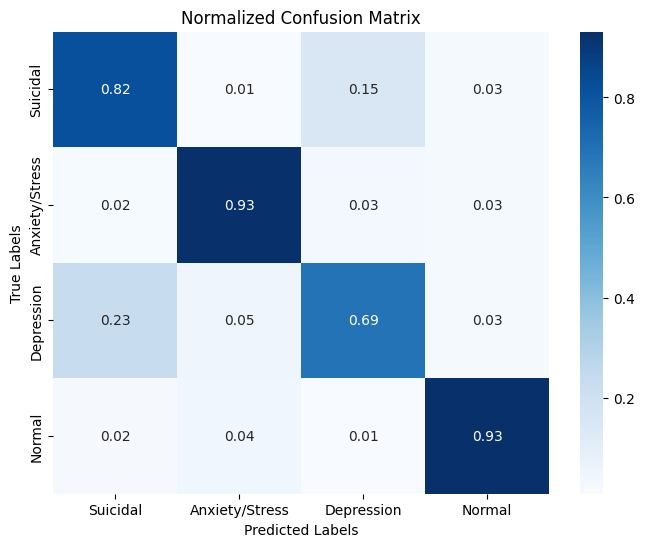

In [138]:
from transformers import TrainingArguments, Trainer
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

# Load the saved model
output_dir = './final_model_updated_v2'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = AutoModelForSequenceClassification.from_pretrained(output_dir)
loaded_model.to(device)  # Explicitly move the model to the correct device

# Reinitialize the Trainer with valid arguments
training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_eval_batch_size=16,  # Example batch size; adjust as needed
    logging_dir='./logs',  # Directory for logs
    evaluation_strategy="no",  # No evaluation during training (can adjust if needed)
)

trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test_dataset,
    tokenizer=tokenizer  # Provide the tokenizer if required
)

# Make predictions
predictions_output = trainer.predict(test_dataset)

# Extract logits and labels
logits = predictions_output.predictions
true_labels = predictions_output.label_ids
predicted_labels = np.argmax(logits, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')

# Save and show plot
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot if needed
# plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
plt.show()  # Display the plot

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2878548255.py:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


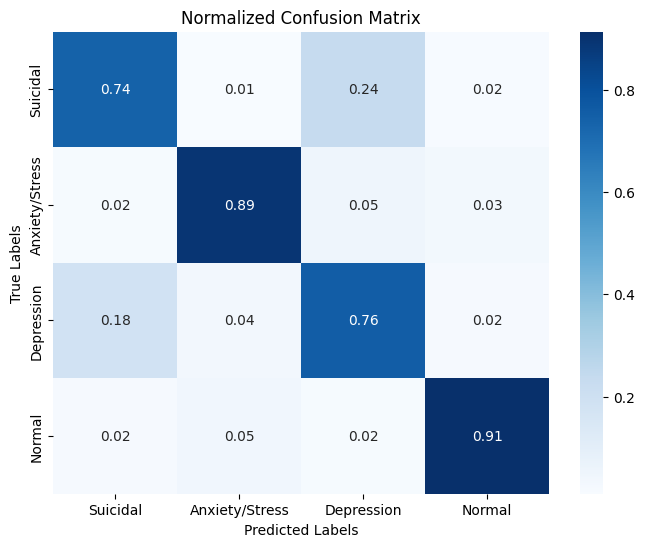

In [139]:
from transformers import TrainingArguments, Trainer
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

# Load the saved model
output_dir = './final_model_updated'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = AutoModelForSequenceClassification.from_pretrained(output_dir)
loaded_model.to(device)  # Explicitly move the model to the correct device

# Reinitialize the Trainer with valid arguments
training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_eval_batch_size=16,  # Example batch size; adjust as needed
    logging_dir='./logs',  # Directory for logs
    evaluation_strategy="no",  # No evaluation during training (can adjust if needed)
)

trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test_dataset,
    tokenizer=tokenizer  # Provide the tokenizer if required
)

# Make predictions
predictions_output = trainer.predict(test_dataset)

# Extract logits and labels
logits = predictions_output.predictions
true_labels = predictions_output.label_ids
predicted_labels = np.argmax(logits, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')

# Save and show plot
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot if needed
# plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
plt.show()  # Display the plot

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2076390959.py:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


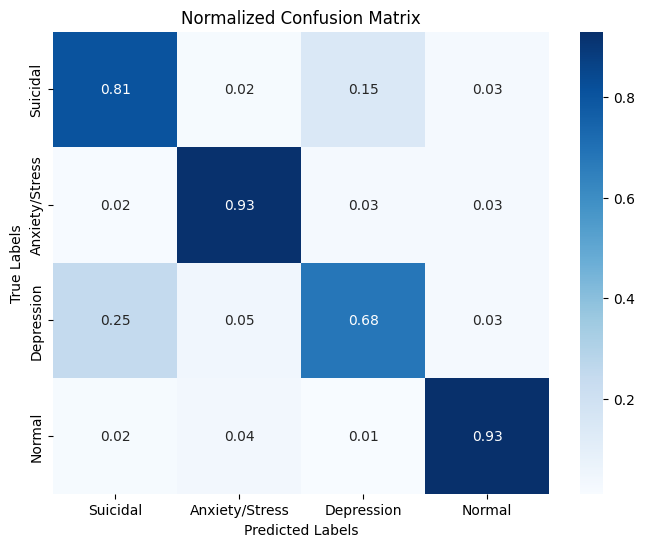

In [141]:
from transformers import TrainingArguments, Trainer
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

# Load the saved model
output_dir = './final_model'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = AutoModelForSequenceClassification.from_pretrained(output_dir)
loaded_model.to(device)  # Explicitly move the model to the correct device

# Reinitialize the Trainer with valid arguments
training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_eval_batch_size=16,  # Example batch size; adjust as needed
    logging_dir='./logs',  # Directory for logs
    evaluation_strategy="no",  # No evaluation during training (can adjust if needed)
)

trainer = Trainer(
    model=loaded_model,
    args=training_args,
    eval_dataset=test_dataset,
    tokenizer=tokenizer  # Provide the tokenizer if required
)

# Make predictions
predictions_output = trainer.predict(test_dataset)

# Extract logits and labels
logits = predictions_output.predictions
true_labels = predictions_output.label_ids
predicted_labels = np.argmax(logits, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')

# Save and show plot
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot if needed
# plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
plt.show()  # Display the plot

In [157]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=3,  # Reduced epochs to avoid overfitting
    per_device_train_batch_size=16,  # Smaller batch size to improve generalization
    per_device_eval_batch_size=16,  # Smaller eval batch size for consistency
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=2e-5,  # Lower learning rate
    weight_decay=0.01,  # Regularization
    max_grad_norm=0.5,  # Gradient clipping to prevent exploding gradients
    warmup_steps=1000,  # Gradual warm-up of learning rate
    lr_scheduler_type='linear',  # Linear learning rate schedule
    metric_for_best_model='eval_loss',  # Track eval_loss for best model selection
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=3)  # Early stop after 3 epochs without improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3169521685.py:92: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.484300,0.443616,0.825500,0.820679,0.833813,0.825500
2,0.380200,0.398824,0.840000,0.839766,0.840540,0.840000
3,0.273400,0.387370,0.854500,0.853603,0.854712,0.854500


Epoch 1.0 finished at 2024-12-09 17:37:46 (Step 1000)
Checkpoint saved at 2024-12-09 17:38:08 (Step 1000)
Checkpoint directory: ./results\checkpoint-1000
Epoch 2.0 finished at 2024-12-09 17:45:52 (Step 2000)
Checkpoint saved at 2024-12-09 17:46:14 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Checkpoint saved at 2024-12-09 17:54:00 (Step 3000)
Checkpoint directory: ./results\checkpoint-3000
Epoch 3.0 finished at 2024-12-09 17:54:00 (Step 3000)
Checkpoint saved at 2024-12-09 17:54:22 (Step 3000)
Checkpoint directory: ./results\checkpoint-3000


TrainOutput(global_step=3000, training_loss=0.49627263259887694, metrics={'train_runtime': 1455.3436, 'train_samples_per_second': 32.982, 'train_steps_per_second': 2.061, 'total_flos': 6358661922816000.0, 'train_loss': 0.49627263259887694, 'epoch': 3.0})

log for this start at /logs/events.out.tfevents.1733794207.DESKTOP-VU0CKF5.29384.54

In [158]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=10,  # Reduced epochs to avoid overfitting
    per_device_train_batch_size=16,  # Smaller batch size to improve generalization
    per_device_eval_batch_size=16,  # Smaller eval batch size for consistency
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=2e-5,  # Lower learning rate
    weight_decay=0.01,  # Regularization
    max_grad_norm=0.5,  # Gradient clipping to prevent exploding gradients
    warmup_steps=1000,  # Gradual warm-up of learning rate
    lr_scheduler_type='linear',  # Linear learning rate schedule
    metric_for_best_model='eval_loss',  # Track eval_loss for best model selection
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=3)  # Early stop after 3 epochs without improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3035236223.py:92: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.519600,0.476950,0.812500,0.805849,0.819411,0.812500
2,0.402000,0.427667,0.827500,0.826173,0.826468,0.827500
3,0.305600,0.437297,0.831000,0.825510,0.843868,0.831000
4,0.238000,0.453769,0.842500,0.841279,0.840550,0.842500
5,0.154300,0.630843,0.844500,0.844303,0.844559,0.844500


Epoch 1.0 finished at 2024-12-09 18:07:24 (Step 1000)
Checkpoint saved at 2024-12-09 18:07:46 (Step 1000)
Checkpoint directory: ./results\checkpoint-1000
Epoch 2.0 finished at 2024-12-09 18:15:31 (Step 2000)
Checkpoint saved at 2024-12-09 18:15:52 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 3.0 finished at 2024-12-09 18:23:36 (Step 3000)
Checkpoint saved at 2024-12-09 18:23:58 (Step 3000)
Checkpoint directory: ./results\checkpoint-3000
Epoch 4.0 finished at 2024-12-09 18:31:47 (Step 4000)
Checkpoint saved at 2024-12-09 18:32:09 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 5.0 finished at 2024-12-09 18:39:53 (Step 5000)
Checkpoint saved at 2024-12-09 18:40:14 (Step 5000)
Checkpoint directory: ./results\checkpoint-5000


TrainOutput(global_step=5000, training_loss=0.40181309833526613, metrics={'train_runtime': 2432.4784, 'train_samples_per_second': 65.777, 'train_steps_per_second': 4.111, 'total_flos': 1.059776987136e+16, 'train_loss': 0.40181309833526613, 'epoch': 5.0})

In [159]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,  # Reduced epochs to avoid overfitting
    per_device_train_batch_size=16,  # Smaller batch size to improve generalization
    per_device_eval_batch_size=16,  # Smaller eval batch size for consistency
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=1e-5,  # Lower learning rate
    weight_decay=0.05,  # Regularization
    max_grad_norm=0.5,  # Gradient clipping to prevent exploding gradients
    warmup_steps=1000,  # Gradual warm-up of learning rate
    lr_scheduler_type='linear',  # Linear learning rate schedule
    metric_for_best_model='eval_loss',  # Track eval_loss for best model selection
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=2)  # Early stop after 3 epochs without improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\3409164212.py:92: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.543400,0.512152,0.792500,0.785829,0.806354,0.792500
2,0.402200,0.429482,0.827500,0.827527,0.827718,0.827500
3,0.341200,0.408239,0.843500,0.841080,0.843298,0.843500
4,0.275400,0.422348,0.845500,0.845170,0.844955,0.845500
5,0.250900,0.425717,0.846500,0.845344,0.845814,0.846500


Epoch 1.0 finished at 2024-12-09 18:55:28 (Step 1000)
Checkpoint saved at 2024-12-09 18:55:50 (Step 1000)
Checkpoint directory: ./results\checkpoint-1000
Epoch 2.0 finished at 2024-12-09 19:03:58 (Step 2000)
Checkpoint saved at 2024-12-09 19:04:21 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 3.0 finished at 2024-12-09 19:12:29 (Step 3000)
Checkpoint saved at 2024-12-09 19:12:52 (Step 3000)
Checkpoint directory: ./results\checkpoint-3000
Epoch 4.0 finished at 2024-12-09 19:21:01 (Step 4000)
Checkpoint saved at 2024-12-09 19:21:24 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Checkpoint saved at 2024-12-09 19:29:35 (Step 5000)
Checkpoint directory: ./results\checkpoint-5000
Epoch 5.0 finished at 2024-12-09 19:29:35 (Step 5000)
Checkpoint saved at 2024-12-09 19:29:58 (Step 5000)
Checkpoint directory: ./results\checkpoint-5000


TrainOutput(global_step=5000, training_loss=0.44632566299438475, metrics={'train_runtime': 2557.7112, 'train_samples_per_second': 31.278, 'train_steps_per_second': 1.955, 'total_flos': 1.059776987136e+16, 'train_loss': 0.44632566299438475, 'epoch': 5.0})

In [160]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,  # Reduced epochs to avoid overfitting
    per_device_train_batch_size=16,  # Smaller batch size to improve generalization
    per_device_eval_batch_size=16,  # Smaller eval batch size for consistency
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=3e-5,  # Slightly lower learning rate
    weight_decay=0.5,  # Regularization
    max_grad_norm=0.5,  # Gradient clipping to prevent exploding gradients
    warmup_steps=1000,  # Gradual warm-up of learning rate
    lr_scheduler_type='linear',  # Linear learning rate schedule
    metric_for_best_model='eval_loss',  # Track eval_loss for best model selection
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=2)  # Early stop after 3 epochs without improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\1289352698.py:92: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.477000,0.454287,0.817500,0.810067,0.831752,0.817500
2,0.368200,0.405298,0.832000,0.831854,0.832798,0.832000
3,0.274600,0.415647,0.843000,0.841214,0.848011,0.843000
4,0.169100,0.520857,0.837500,0.837430,0.837658,0.837500


Epoch 1.0 finished at 2024-12-09 19:40:51 (Step 1000)
Checkpoint saved at 2024-12-09 19:41:12 (Step 1000)
Checkpoint directory: ./results\checkpoint-1000
Epoch 2.0 finished at 2024-12-09 19:49:06 (Step 2000)
Checkpoint saved at 2024-12-09 19:49:27 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 3.0 finished at 2024-12-09 19:57:06 (Step 3000)
Checkpoint saved at 2024-12-09 19:57:27 (Step 3000)
Checkpoint directory: ./results\checkpoint-3000
Epoch 4.0 finished at 2024-12-09 20:05:26 (Step 4000)
Checkpoint saved at 2024-12-09 20:05:49 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


TrainOutput(global_step=4000, training_loss=0.39894823694229126, metrics={'train_runtime': 1953.821, 'train_samples_per_second': 40.945, 'train_steps_per_second': 2.559, 'total_flos': 8478215897088000.0, 'train_loss': 0.39894823694229126, 'epoch': 4.0})

In [161]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=5,  # Reduced epochs to avoid overfitting
    per_device_train_batch_size=8,  # Smaller batch size to improve generalization
    per_device_eval_batch_size=8,  # Smaller eval batch size for consistency
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=1e-5,  # Slightly lower learning rate
    weight_decay=0.1,  # Regularization
    max_grad_norm=1.0,  # Gradient clipping to prevent exploding gradients
    warmup_steps=1000,  # Gradual warm-up of learning rate
    lr_scheduler_type='linear',  # Linear learning rate schedule
    metric_for_best_model='eval_loss',  # Track eval_loss for best model selection
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=3)  # Early stop after 3 epochs without improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\2674799787.py:92: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` i

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.479400,0.466566,0.818000,0.812628,0.832454,0.818000
2,0.368000,0.440958,0.834000,0.832660,0.832049,0.834000
3,0.286400,0.469452,0.841500,0.837480,0.848953,0.841500
4,0.260900,0.479027,0.844500,0.843290,0.843021,0.844500
5,0.231800,0.527670,0.840000,0.838176,0.839600,0.840000


Epoch 1.0 finished at 2024-12-09 20:20:15 (Step 2000)
Checkpoint saved at 2024-12-09 20:20:36 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 2.0 finished at 2024-12-09 20:28:44 (Step 4000)
Checkpoint saved at 2024-12-09 20:29:05 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 3.0 finished at 2024-12-09 20:37:14 (Step 6000)
Checkpoint saved at 2024-12-09 20:37:35 (Step 6000)
Checkpoint directory: ./results\checkpoint-6000
Epoch 4.0 finished at 2024-12-09 20:45:44 (Step 8000)
Checkpoint saved at 2024-12-09 20:46:05 (Step 8000)
Checkpoint directory: ./results\checkpoint-8000
Checkpoint saved at 2024-12-09 20:54:24 (Step 10000)
Checkpoint directory: ./results\checkpoint-10000
Epoch 5.0 finished at 2024-12-09 20:54:24 (Step 10000)
Checkpoint saved at 2024-12-09 20:54:45 (Step 10000)
Checkpoint directory: ./results\checkpoint-10000


TrainOutput(global_step=10000, training_loss=0.41102002296447754, metrics={'train_runtime': 2557.8587, 'train_samples_per_second': 31.276, 'train_steps_per_second': 3.91, 'total_flos': 1.059776987136e+16, 'train_loss': 0.41102002296447754, 'epoch': 5.0})

In [163]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
    seed=42,
    output_dir='./results',
    num_train_epochs=3,  # Adjusted epochs to prevent overfitting
    per_device_train_batch_size=8,  # Small batch size for regularization
    per_device_eval_batch_size=8,  # Small eval batch size for consistency
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy='epoch',  # Save after each epoch
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=1e-5,  # Reduced learning rate for better convergence
    weight_decay=0.2,  # Adjusted weight decay for better regularization
    max_grad_norm=1.0,  # Gradient clipping to prevent exploding gradients
    warmup_steps=1000,  # Gradual warm-up of learning rate
    lr_scheduler_type='cosine',  # Cosine annealing learning rate scheduler
    metric_for_best_model='eval_loss',  # Track eval_loss for best model selection
    save_steps=1000,  # Save checkpoints at regular intervals
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=4)  # Early stop after 3 epochs without improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\637304065.py:93: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` in

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.461700,0.462881,0.810000,0.805896,0.822899,0.810000
2,0.352800,0.422121,0.841000,0.839470,0.839210,0.841000
3,0.276000,0.436887,0.841500,0.839599,0.843268,0.841500


Epoch 1.0 finished at 2024-12-09 22:21:16 (Step 2000)
Checkpoint saved at 2024-12-09 22:21:38 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Epoch 2.0 finished at 2024-12-09 22:30:28 (Step 4000)
Checkpoint saved at 2024-12-09 22:30:51 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Checkpoint saved at 2024-12-09 22:39:20 (Step 6000)
Checkpoint directory: ./results\checkpoint-6000
Epoch 3.0 finished at 2024-12-09 22:39:20 (Step 6000)
Checkpoint saved at 2024-12-09 22:39:42 (Step 6000)
Checkpoint directory: ./results\checkpoint-6000


TrainOutput(global_step=6000, training_loss=0.4960311657587687, metrics={'train_runtime': 1638.2212, 'train_samples_per_second': 29.3, 'train_steps_per_second': 3.663, 'total_flos': 6358661922816000.0, 'train_loss': 0.4960311657587687, 'epoch': 3.0})

In [164]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import evaluate  # Import evaluate instead of load_metric
from transformers import EarlyStoppingCallback  # Import EarlyStoppingCallback
from datetime import datetime

# Define the custom callback to log time and checkpoint name
class TimeLoggingCallback(TrainerCallback):
    def on_save(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        checkpoint_name = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
        print(f"Checkpoint saved at {timestamp} (Step {state.global_step})")
        print(f"Checkpoint directory: {checkpoint_name}")

    def on_epoch_end(self, args, state, control, **kwargs):
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Epoch {state.epoch} finished at {timestamp} (Step {state.global_step})")

# Use the correct tokenized dataset
train_dataset = tokenized_train  # Tokenized train dataset
validation_dataset = tokenized_validation  # Tokenized validation dataset
test_dataset = tokenized_test  # Tokenized test dataset

# Define the checkpoint and labels
checkpoint = 'distilbert-base-uncased'

# Extract labels from the training dataset dynamically
labels = train_dataset.features['status'].names  # This will get the unique labels from the 'status' column

# Create label to ID and ID to label mappings dynamically
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

# Print label mappings for verification
print("Label to ID mapping:", label2id)
print("ID to Label mapping:", id2label)

# Initialize the model with dynamically generated label mappings
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=len(labels),  # Number of labels based on the dataset
    id2label=id2label,  # Correctly map IDs to labels
    label2id=label2id   # Correctly map labels to IDs
)

# Load metrics
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

# Define training arguments with hyperparameter tuning
training_args = TrainingArguments(
        seed=42,
    output_dir='./results',
    num_train_epochs=2,  # Reduce epochs to prevent overfitting
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    logging_dir='./logs',
    logging_steps=100,
    learning_rate=1e-5,
    weight_decay=0.1,  # Adjusted weight decay
    max_grad_norm=1.0,
    warmup_steps=1500,  # Increased warm-up steps for smoother training
    lr_scheduler_type='cosine',
    metric_for_best_model='eval_loss',
)

# Setup early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=1)  # Early stop after 3 epochs without improvement

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # Direct reference to train dataset
    eval_dataset=validation_dataset,  # Direct reference to validation dataset
    tokenizer=tokenizer,  # Ensure tokenizer is defined
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback, TimeLoggingCallback()]  # Add both early stopping and time logging callbacks
)

# Disable WandB logging if not needed
os.environ['WANDB_DISABLED'] = "true"

# Train the model
trainer.train()

Label to ID mapping: {'Suicidal': 0, 'Anxiety/Stress': 1, 'Depression': 2, 'Normal': 3}
ID to Label mapping: {0: 'Suicidal', 1: 'Anxiety/Stress', 2: 'Depression', 3: 'Normal'}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
C:\Users\PC\AppData\Local\Temp\ipykernel_29384\983958701.py:92: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` in

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.503300,0.485984,0.811000,0.806924,0.823014,0.811000
2,0.400400,0.443565,0.830000,0.828208,0.830822,0.830000


Epoch 1.0 finished at 2024-12-09 22:49:42 (Step 2000)
Checkpoint saved at 2024-12-09 22:50:04 (Step 2000)
Checkpoint directory: ./results\checkpoint-2000
Checkpoint saved at 2024-12-09 22:58:34 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000
Epoch 2.0 finished at 2024-12-09 22:58:34 (Step 4000)
Checkpoint saved at 2024-12-09 22:58:56 (Step 4000)
Checkpoint directory: ./results\checkpoint-4000


TrainOutput(global_step=4000, training_loss=0.6313728761672973, metrics={'train_runtime': 1063.1717, 'train_samples_per_second': 30.099, 'train_steps_per_second': 3.762, 'total_flos': 4239107948544000.0, 'train_loss': 0.6313728761672973, 'epoch': 2.0})

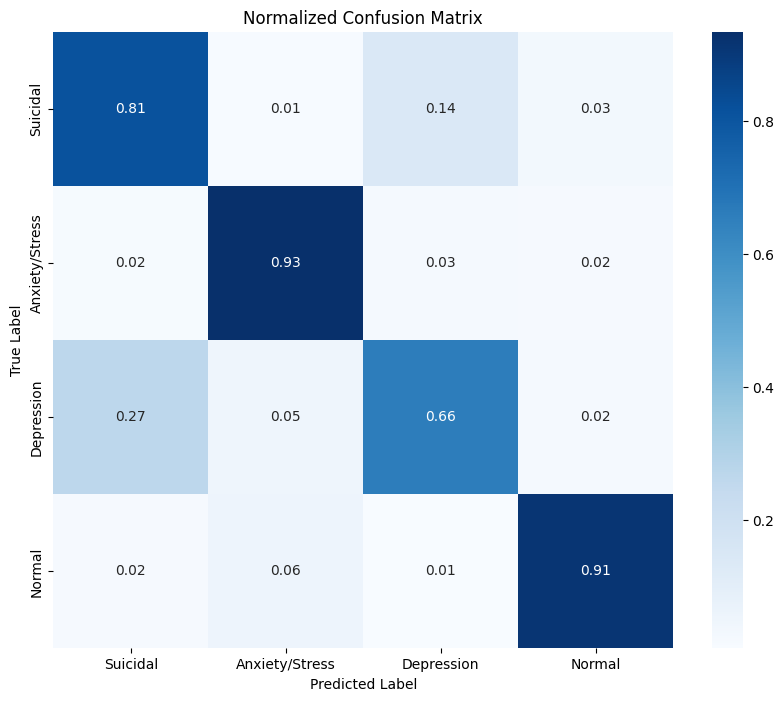

In [167]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict and calculate the confusion matrix
preds, labels, _ = trainer.predict(validation_dataset)
conf_matrix = confusion_matrix(labels, preds.argmax(axis=1), normalize="true")

# Use the id2label dictionary for class names
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=id2label.values(), yticklabels=id2label.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()




In [187]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Define the checkpoint path to the saved model
checkpoint_path = './final_model_updated'  # or another checkpoint folder

# Load the model and tokenizer from the saved directory
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_path)
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)

In [186]:
from transformers import pipeline
import torch

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1

# Create the pipeline for sentiment analysis with the device argument
sentiment_classifier = pipeline(task='sentiment-analysis', model=model, tokenizer=tokenizer, device=device)

# Now you can use the model to make predictions
paragraph = "i want to die "
result = sentiment_classifier(paragraph)

print(result)

[{'label': 'Suicidal', 'score': 0.9464471340179443}]


In [188]:
# Get predictions on the test dataset
test_predictions = trainer.predict(test_dataset)

# Extract logits and actual labels
logits = test_predictions.predictions
labels = test_predictions.label_ids

# Get predicted labels (the index with the highest probability)
predicted_labels = logits.argmax(axis=-1)

# Find misclassified samples
misclassified_indices = (predicted_labels != labels)  # This will give a boolean mask of misclassified samples

# Extract misclassified examples and their corresponding predictions
misclassified_samples = []
for idx in range(len(misclassified_indices)):
    if misclassified_indices[idx]:
        misclassified_samples.append({
            'text': test_dataset[idx]['text'],  # assuming your dataset has a 'text' field
            'true_label': labels[idx],
            'predicted_label': predicted_labels[idx]
        })

# Print or log the misclassified examples
for sample in misclassified_samples:
    print(f"Text: {sample['text']}")
    print(f"True Label: {sample['true_label']} -> {id2label[sample['true_label']]}")
    print(f"Predicted Label: {sample['predicted_label']} -> {id2label[sample['predicted_label']]}")
    print("-" * 50)

Text: I am so upset and I hate myself I want to fucking die I feel worthless and nobody is awake to talk to me and I just want somebody to listen to me or talk to me or something I just want to pretend what I say is important to somebody even if just for a few minutes please Please can anybody talk to me
True Label: 2 -> Depression
Predicted Label: 0 -> Suicidal
--------------------------------------------------
Text: Already borrowed what I can from family and friends living on my own and rather exhausted that Id rather not share my specific adress in public so PM if you want to help Got no preferences but a kebab or pizza with varied stuff in it would be great for nutrition Hate asking for this but Im at a low point and getting rather desperate If ordering isnt the thing for you a small amount of money to buy something cheap at the store is just as good
True Label: 1 -> Anxiety/Stress
Predicted Label: 3 -> Normal
--------------------------------------------------
Text: gimmethefife N

log file path for this train  is /logs/events.out.tfevents.1733466131.DESKTOP-VU0CKF5.29384.7

In [61]:
import os

checkpoint_dir = r'C:/Users/PC/Desktop/IAT 360 MENTAL HEALTH/Results'
checkpoint_folders = [f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint-')]

print("List of Checkpoints:")
for folder in checkpoint_folders:
    print(folder)

List of Checkpoints:
checkpoint-1000
checkpoint-2000
checkpoint-3000
checkpoint-4000
checkpoint-5000


In [64]:
import os
import datetime

checkpoint_dir = r'C:/Users/PC/Desktop/IAT 360 MENTAL HEALTH/Results'
checkpoint_folders = [f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint-')]

for folder in checkpoint_folders:
    folder_path = os.path.join(checkpoint_dir, folder)
    timestamp = os.path.getmtime(folder_path)
    print(f"Checkpoint {folder} was created at {datetime.datetime.fromtimestamp(timestamp)}")


Checkpoint checkpoint-1000 was created at 2024-12-05 21:13:25.531747
Checkpoint checkpoint-2000 was created at 2024-12-05 21:36:22.701065
Checkpoint checkpoint-3000 was created at 2024-12-05 23:10:47.185390
Checkpoint checkpoint-4000 was created at 2024-12-05 23:11:15.107890
Checkpoint checkpoint-5000 was created at 2024-12-05 23:12:30.397226


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Function to extract metrics and adjust the epoch values
def extract_metrics_with_checkpoints(event_file, checkpoint_dir):
    metrics = {
        'epoch': [],
        'eval_accuracy': [],
        'eval_f1': [],
        'eval_precision': [],
        'eval_recall': [],
        'checkpoint': []
    }

    # Iterate over the event file and extract the metrics
    for summary in tf.compat.v1.train.summary_iterator(event_file):
        for value in summary.summary.value:
            if value.tag == 'eval/accuracy':
                metrics['epoch'].append(summary.step)  # Capture the epoch (step)
                metrics['eval_accuracy'].append(value.simple_value)
                # Check if a checkpoint exists at this step
                checkpoint = find_checkpoint_for_step(checkpoint_dir, summary.step)
                metrics['checkpoint'].append(checkpoint)  # Store the checkpoint filename or step
            elif value.tag == 'eval/f1':
                metrics['eval_f1'].append(value.simple_value)
            elif value.tag == 'eval/precision':
                metrics['eval_precision'].append(value.simple_value)
            elif value.tag == 'eval/recall':
                metrics['eval_recall'].append(value.simple_value)

    return metrics

# Function to find the checkpoint directory corresponding to a step
def find_checkpoint_for_step(checkpoint_dir, step):
    # List all checkpoint directories in the given directory
    checkpoint_folders = [f for f in os.listdir(checkpoint_dir) if 'checkpoint' in f]
    # Match the step with a checkpoint directory (this is a simplistic approach)
    for folder in checkpoint_folders:
        if f'checkpoint-{step}' in folder:
            return folder
    return None  # If no checkpoint found, return None

# Specify the correct path to the event file and checkpoint directory
event_file = r'C:/Users/PC/Desktop/IAT 360 MENTAL HEALTH/logs/events.out.tfevents.1733462449.DESKTOP-VU0CKF5.29384.6'
checkpoint_dir = r'C:/Users/PC/Desktop/IAT 360 MENTAL HEALTH/checkpoints'

# Extract the metrics from the event file
metrics = extract_metrics_with_checkpoints(event_file, checkpoint_dir)

# Filter metrics for the first 5 epochs (if available)
epochs_to_show = 5
epochs_filtered = {
    'epoch': metrics['epoch'][:epochs_to_show],
    'eval_accuracy': metrics['eval_accuracy'][:epochs_to_show],
    'eval_f1': metrics['eval_f1'][:epochs_to_show],
    'eval_precision': metrics['eval_precision'][:epochs_to_show],
    'eval_recall': metrics['eval_recall'][:epochs_to_show],
    'checkpoint': metrics['checkpoint'][:epochs_to_show]
}

# Display the filtered metrics with checkpoints
for i in range(epochs_to_show):
    print(f"Epoch {epochs_filtered['epoch'][i]} - Checkpoint: {epochs_filtered['checkpoint'][i]}:")
    print(f"  Accuracy: {epochs_filtered['eval_accuracy'][i]:.4f}")
    print(f"  F1 Score: {epochs_filtered['eval_f1'][i]:.4f}")
    print(f"  Precision: {epochs_filtered['eval_precision'][i]:.4f}")
    print(f"  Recall: {epochs_filtered['eval_recall'][i]:.4f}")
    print("-" * 30)

# Plot the extracted metrics for the first 5 epochs
plt.figure(figsize=(10, 6))

# Plot each metric with different styles
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_accuracy'], label='Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_f1'], label='F1 Score', color='green', linestyle='-', marker='x')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_precision'], label='Precision', color='red', linestyle='-', marker='s')
plt.plot(epochs_filtered['epoch'], epochs_filtered['eval_recall'], label='Recall', color='orange', linestyle='-', marker='^')

# Label axes and title
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Over Epochs')

# Add the legend to the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Metrics")

# Enable grid for better readability
plt.grid(True)

# Adjust the layout so the legend does not overlap
plt.tight_layout()

# Display the plot
plt.show()


In [27]:
import shutil
import os

# Specify the path to the 'runs' folder
runs_folder_path = "./Results/runs"

# Check if the folder exists
if os.path.exists(runs_folder_path):
    # Delete the folder and its contents
    shutil.rmtree(runs_folder_path)
    print(f"Deleted the folder: {runs_folder_path}")
else:
    print(f"The folder does not exist: {runs_folder_path}")

Deleted the folder: ./Results/runs


In [21]:
import tensorflow as tf

# Path to the TensorFlow event file
log_dir = r'C:\Users\PC\Desktop\IAT 360 MENTAL HEALTH\logs\events.out.tfevents.1733454193.DESKTOP-VU0CKF5.29384.0'

# Function to extract and print available tags in the event file
def print_available_tags(event_file):
    for summary in tf.compat.v1.train.summary_iterator(event_file):
        for value in summary.summary.value:
            print(f"Found tag: {value.tag}")

# Print the available tags to understand the structure of the event file
print_available_tags(log_dir)

Found tag: args/text_summary
Found tag: model_config/text_summary
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found tag: train/loss
Found tag: train/grad_norm
Found tag: train/learning_rate
Found tag: train/epoch
Found t

In [ ]:
!pip show torch
!pip show accelerate
!pip show transformers

Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: accelerate, torchaudio, torchvision, ultralytics, ultralytics-thop
Name: accelerate
Version: 1.1.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 
Name: transformers
Version: 4.46.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers

In [ ]:
import torch
print(torch.cuda.is_available())  # Should print True if CUDA is available


True


In [ ]:
import os

# Define the directory paths for results and logs
results_dir = './Results'
logs_dir = './logs'

# Create the directories if they don't exist
os.makedirs(results_dir, exist_ok=True)
os.makedirs(logs_dir, exist_ok=True)

# Now you can use these directories to store results and logs
print(f"Folder '{results_dir}' has been created successfully!")
print(f"Folder '{logs_dir}' has been created successfully!")

Folder './Results' has been created successfully!
Folder './logs' has been created successfully!


In [ ]:
!pip install transformers[torch] accelerate


In [ ]:
import torch
import accelerate
from transformers import Trainer

print(torch.__version__)   # Check PyTorch version
print(accelerate.__version__)  # Check Accelerate version


2.5.1+cu124
1.1.1


In [ ]:
!pip install --upgrade accelerate


In [ ]:
import torch
import accelerate

print(torch.__version__)   # Ensure the PyTorch version is as expected
print(accelerate.__version__)  # Should now be >= 0.26.0


2.5.1+cu124
1.1.1


In [ ]:
!pip install --upgrade accelerate transformers


In [ ]:
import torch
import accelerate
import transformers

print(torch.__version__)      # Ensure PyTorch is correctly installed
print(accelerate.__version__) # Ensure accelerate is updated (>=0.26.0)
print(transformers.__version__) # Check transformers version


2.5.1+cu124
1.1.1
4.46.3


In [ ]:
!pip install --upgrade accelerate==0.26.0


  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.1.1
    Uninstalling accelerate-1.1.1:
      Successfully uninstalled accelerate-1.1.1


In [ ]:
import torch
import accelerate
import transformers

print(f"PyTorch version: {torch.__version__}")
print(f"Accelerate version: {accelerate.__version__}")
print(f"Transformers version: {transformers.__version__}")


PyTorch version: 2.5.1+cu124
Accelerate version: 1.1.1
Transformers version: 4.46.3


In [ ]:
pip uninstall accelerate -y


Found existing installation: accelerate 0.26.0
Uninstalling accelerate-0.26.0:
  Successfully uninstalled accelerate-0.26.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install accelerate==0.26.0


  Using cached accelerate-0.26.0-py3-none-any.whl.metadata (18 kB)
Using cached accelerate-0.26.0-py3-none-any.whl (270 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import accelerate
print(f"Accelerate version: {accelerate.__version__}")


Accelerate version: 1.1.1
